In [22]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
from scipy import stats 
import IS as isfn
import pandas as pd

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload
     
# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [336]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
s_powlist = sorted(glob.glob('*BLN*power*size*.npy*')) 
s_loglist = sorted(glob.glob('*BLN*logn*size*'))
s_powlist, s_loglist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_power_size.npy'],
 ['PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_size.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_size.npy',
  'PTZ-WILDTYPE-0

In [335]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
d_powlist = sorted(glob.glob('*BLN*power*dur*.npy*')) 
d_loglist = sorted(glob.glob('*BLN*logn*dur*'))
d_powlist, d_loglist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_power_dur.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_dur.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_dur.npy',
  'PTZ-WILDTYPE-05_2photon_se

In [ ]:
shape = 320
avlist = list(range(shape))
nums = adfn.name(F10t, experiment, 2, 12)
for t in nums:
    itav = sorted(glob.glob('*E-' + str(t) + '*nnbav.npy*')) 
    for i in range(len(itav)): 
        avlist[i] = powerfit(Fdrop, experiment, np.load(itav[i])[0])
    np.save(Fdrop + 'Project/' + experiment + os.sep + itav[i][:itav[i].find('run')+6] + 'sizeparamsweepp_log', avlist)
    print('Done fish num ' + str(f))     

In [ ]:
for i in num1:
    avlist =  sorted(glob.glob('*-' + i + '*BLN*nnbav.npy'))[:180]
    powerlist = list(range(200))
    lognlist = list(range(200))
    for e in range(len(avlist)):
        data = np.load(avlist[e])
        sizes=data[0,:]
        M=len(sizes)
        a=min(sizes) #define xmin
        b=max(sizes) #define xmax
        npart = 2000 #number of particles - number of draws from prior distribution
        ln=IS_LN(npart)
        po=IS(npart)
        powerlist[e] = po
        lognlist[e] = ln
        print('Done param ' + str(e) + 'for fish ' + adfn.name_template([avlist[e]], 'short'))
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_power.npy', powerlist)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_logn.npy', lognlist)
    print('Done fish ' + adfn.name_template([avlist[e]], 'short'))

In [ ]:
num1 = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for i in num1:
    avlist =  sorted(glob.glob('*-' + i + '*BLN*nnbav.npy'))[:180]
    powerlist = list(range(200))
    lognlist = list(range(200))
    for e in range(len(avlist)):
        data = np.load(avlist[e])
        sizes=data[1,:]
        a=2 #define xmin
        b=max(sizes) #define xmax
        M=len(sizes[np.where(sizes>a-1)])
        npart = 2000 #number of particles - number of draws from prior distribution
        ln=isfn.IS_LN(npart, sizes, M, a, b)
        po=isfn.IS(npart, sizes, M, a, b)
        powerlist[e] = po
        lognlist[e] = ln
        print('Done param ' + str(e) + 'for fish ' + adfn.name_template([avlist[e]], 'short'))
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_power_dur.npy', powerlist)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_logn_dur.npy', lognlist)
    print('Done fish ' + adfn.name_template([avlist[e]], 'short'))

# Baseline - parameter sweep

### Exponent
* exponent is parameter dependent
* variance decreases as the exponent approaches theoretical values ~ 2.0
* Higher P(Ca2+ event) values over-estimate firing frequency - we chose those that best capture firing events in data

In [337]:
shape = (180)
count=0
expsum = np.zeros((shape))
varvec = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(s_powlist)):
        if type(np.load(s_powlist[t], allow_pickle=True)[i]) is not int:
            evec = np.append(evec, np.load(s_powlist[t], allow_pickle = True)[i][0])
        varvec[i] = np.var(evec)
        expsum[i] = np.sum(evec)/len(evec) 

In [284]:
np.linspace(0.03,0.23, 21)

array([0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13,
       0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23])

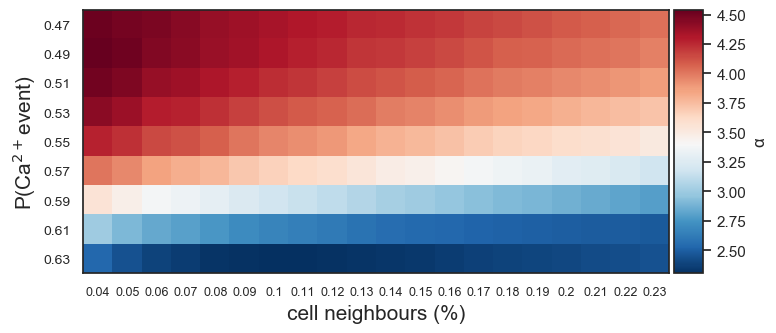

In [338]:
#SIZE - EXPONENT
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.linspace(0.03,0.23, 21)[i])

divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav, cmap = 'RdBu_r', norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 9)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'α')
plt.savefig(Ffig + 'par_exp_size.svg', transparent = True)
plt.show()

In [339]:
d_powlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_power_dur.npy']

In [340]:
shape = (180)
count=0
expsum = np.zeros((shape))
varvec = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(d_powlist)):
        if type(np.load(d_powlist[t], allow_pickle=True)[i]) is not int:
            evec = np.append(evec, np.load(d_powlist[t], allow_pickle = True)[i][0])
        varvec[i] = np.var(evec)
        expsum[i] = np.sum(evec)/len(evec) 

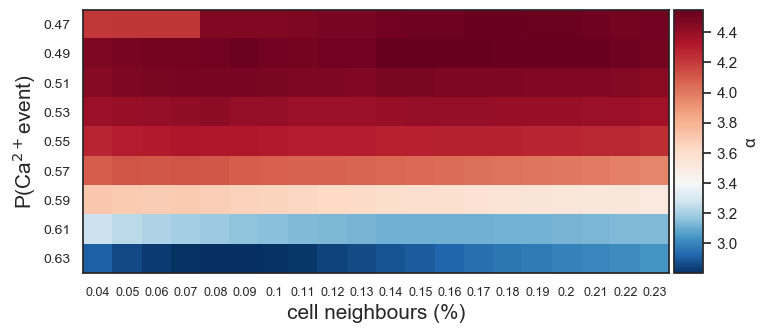

In [341]:
#SIZE - EXPONENT
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav, cmap = 'RdBu_r', norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 9)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'α')
plt.savefig(Ffig + 'par_exp_dur.svg', transparent = True)
plt.show()

#### Marginal likelihood map
* power law is invariant to parameters

* {calculate individual marginal likelihood values for each fish}
* {loglik ratio - sum marglikelihoods for each fish for power law and lognormal - overall ratio}

In [382]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
s_powlist = sorted(glob.glob('*BLN*power*size*.npy*'))
s_loglist = sorted(glob.glob('*BLN*logn*size*'))
s_powlist, s_loglist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_size.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_power_size.npy'],
 ['PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_size.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_size.npy',
  'PTZ-WILDTYPE-0

In [308]:
shape = (180)
mratio = np.zeros((shape))
for i in range(shape):
    powvec, logvec = 0,0
    for t in range(len(s_powlist)):
        if type(np.load(s_powlist[t], allow_pickle=True)[i]) is not int:
            powvec = powvec + np.load(s_powlist[t], allow_pickle = True)[i][1]
            logvec = logvec +  np.load(s_loglist[t], allow_pickle = True)[i][2]
    mratio[i] = powvec - logvec

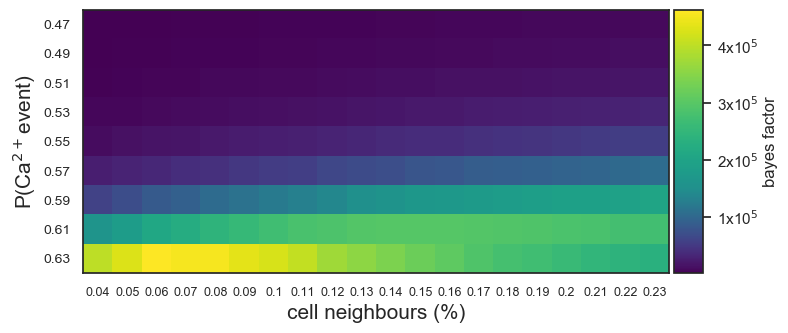

In [309]:
#MARGINAL LIKELIHOOD
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors


divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(mratio.shape[0]/nnbs)
margav = mratio.reshape((bcls,nnbs))    
plot1 = ax.imshow(margav, cmap = 'viridis', norm=divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 9)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'bayes factor')
cbar0.ax.set_yticklabels(['1x10$^{5}$', '2x10$^{5}$', '3x10$^{5}$', '4x10$^{5}$', '5x10$^{5}$', '6x10$^{5}$'])  # vertically oriented colorbar
plt.savefig(Ffig + 'par_LLR_size.svg', transparent = True)
plt.show()

In [310]:
d_powlist, d_loglist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power_dur.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_power_dur.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_dur.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn_dur.npy',
  'PTZ-WILDTYPE-05_2photon_se

In [311]:
shape = (180)
mratio = np.zeros((shape))
for i in range(shape):
    powvec, logvec = 0,0
    for t in range(len(d_powlist)):
        if type(np.load(d_powlist[t], allow_pickle=True)[i]) is not int:
            powvec = powvec + np.load(d_powlist[t], allow_pickle = True)[i][1]
            logvec = logvec +  np.load(d_loglist[t], allow_pickle = True)[i][2]
    mratio[i] = powvec - logvec

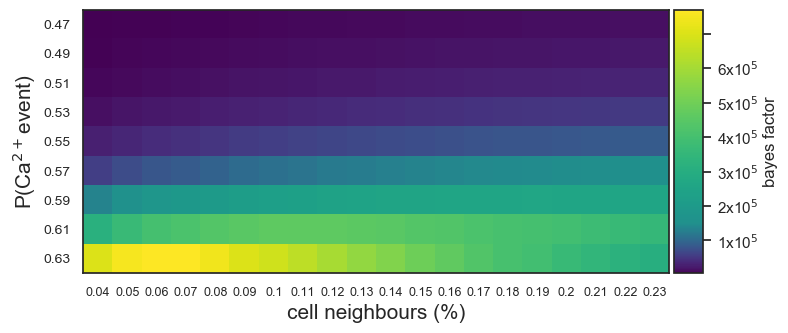

In [312]:
#MARGINAL LIKELIHOOD
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors


divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(mratio.shape[0]/nnbs)
margav = mratio.reshape((bcls,nnbs))    
plot1 = ax.imshow(margav, cmap = 'viridis', norm=divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 9)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'bayes factor')
cbar0.ax.set_yticklabels(['1x10$^{5}$', '2x10$^{5}$', '3x10$^{5}$', '4x10$^{5}$', '5x10$^{5}$', '6x10$^{5}$'])  # vertically oriented colorbar
plt.savefig(Ffig + 'par_LLR_dur.svg', transparent = True)
plt.show()

#### Branching ratio map
* branching ratio is close to critical value for all parameter values

In [326]:
num = adfn.name_zero('front', 2, 12,1)
shape = (200)
b_sum = np.zeros((11, shape))
count=0
for e in num:
    if e!= '03':
        branchlist =  sorted(glob.glob('*E-*' + e + '*BLN*_branch.npy'))
        for i in range(len(branchlist)):
            b_sum[count,i] = np.load(branchlist[i])
        count+=1

b_mean = np.zeros(200)

for i in range(b_sum.shape[1]):
    b_mean[i] = np.sum(b_sum[:,i])/ np.where(b_sum[:,i] >0)[0].shape[0]

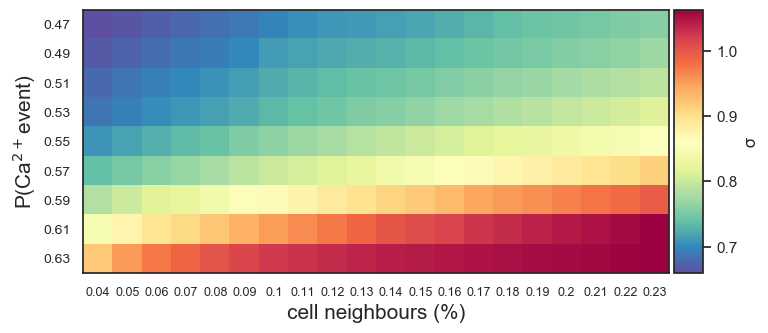

In [328]:
#BRANCHING RATIO
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.linspace(0.03,0.23, 21)[i])
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = 9 #np.int(b_mean.shape[0]/nnbs)
bmean_mat = b_mean[:180].reshape((bcls,nnbs))    
plot1 = ax.imshow(bmean_mat, cmap = 'Spectral_r')
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 9)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'σ')
plt.savefig(Ffig + 'par_BR.svg', transparent = True)
plt.show()

In [343]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
dcc_list = sorted(glob.glob('*DCC*sweep*'))
dcc_list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01-DCC-sweep.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09-DCC-sweep.npy']

In [ ]:
num = adfn.name_zero('front', 4, 12, 1)
for i in num:
    av_list = sorted(glob.glob('*-' + i + '*BLN*av*'))[:180]
    nnb = np.arange(4, 24)
    bcl = np.arange(0.47, 0.63, 0.02)
    curr_fish = np.zeros((nnb.shape[0], bcl.shape[0])).T

    count=0
    for e in range(curr_fish.shape[0]):
        for x in range(curr_fish.shape[1]):
            curr_av = np.load(av_list[count])
            curr_fish[e][x] = crfn.DCC(curr_av)
            count+=1
    name = adfn.name_template([av_list][0], 'short') 
    np.save(savepath + name + '-DCC-sweep.npy', curr_fish)
    print('DOne ' + str(i))

In [345]:
shape = (180)
dcc_sum = np.zeros((10, shape))
count=0
for e in range(len(dcc_list)):
    curr = np.load(dcc_list[e])
    flat = np.ravel(curr)
    for x in range(len(flat)):
        dcc_sum[e, x] = flat[x]

dcc_mean = np.zeros(180)
for i in range(dcc_sum.shape[1]):
    dcc_mean[i] = np.sum(dcc_sum[:,i])/ np.where(dcc_sum[:,i] >0)[0].shape[0]

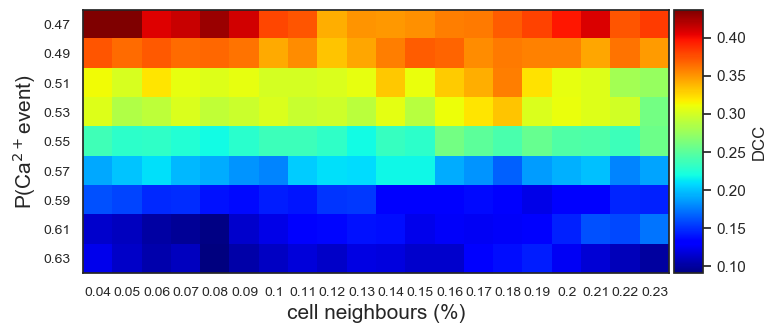

In [348]:
#DCC
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.linspace(0.03,0.23, 21)[i])
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))

nnbs = 20
bcls = 9 #np.int(b_mean.shape[0]/nnbs)
mean_mat = dcc_mean[:180].reshape((bcls,nnbs))    
plot1 = ax.imshow(mean_mat, cmap = 'jet')
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'DCC')
plt.savefig(Ffig + 'par_dcc.svg', transparent = True)
plt.show()

# Seizure - parameter sweep

#### KS distance map 
* deviation from baseline distribution is consistent across parameters

In [63]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
kslist = sorted(glob.glob('*param_ks*'))
kslist

['_param_ks.npy']

In [64]:
shape = (200)
count=0
ks_sum = np.zeros((shape))
for i in range(shape):
    ks_vec = []
    for t in range(len(np.load(kslist[0]))):
        ks_vec = np.append(ks_vec, np.load(kslist[0])[t][i][0])
        ks_sum[i] = np.sum(ks_vec)/len(ks_vec) 

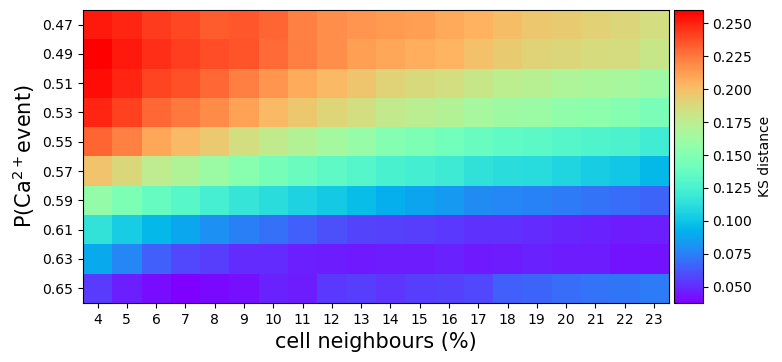

In [65]:
#KS distance
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
    
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(ks_sum.shape[0]/nnbs)
ks_av = ks_sum.reshape((bcls,nnbs))    
plot1 = ax.imshow(ks_av, cmap = 'rainbow')#, norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'KS distance')
plt.show()

In [29]:
shape = (200)
count=0
p_sum = np.zeros((shape))
for i in range(shape):
    p_vec = []
    for t in range(len(np.load(kslist[0]))):
        p_vec = np.append(p_vec, np.load(kslist[0])[t][i][1])
        p_sum[i] = np.sum(p_vec < 0.05)/len(p_vec) 

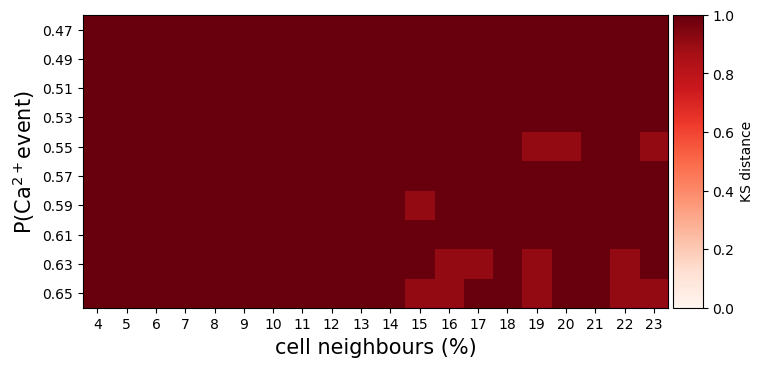

In [30]:
#p value
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
    
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(p_sum.shape[0]/nnbs)
p_av = p_sum.reshape((bcls,nnbs))    
plot1 = ax.imshow(p_av, cmap = 'Reds', vmin = 0, vmax = 1)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'KS distance')
plt.show()

#### Branching ratio change map

In [31]:
num = adfn.name_zero('front', 2, 12,1)
shape = (200)
b_sum = np.zeros((11, shape))
count=0
for e in num:
    b_branchlist =  sorted(glob.glob('*E-*' + e + '*BLN*_branch.npy'))
    p_branchlist =  sorted(glob.glob('*E-*' + e + '*PTZ20*_branch.npy'))
    for i in range(len(b_branchlist)):
        b_sum[count,i] = np.load(p_branchlist[i]) - np.load(b_branchlist[i])
    count+=1

b_mean = np.zeros(200)

for i in range(b_sum.shape[1]):
    b_mean[i] = np.sum(b_sum[:,i])/ np.where(b_sum[:,i] >0)[0].shape[0]

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


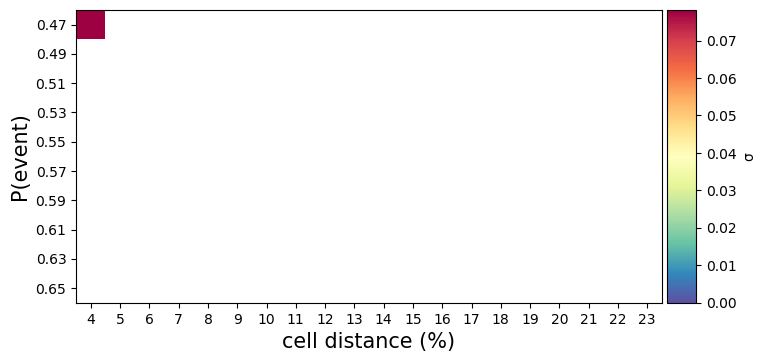

In [32]:
#BRANCHING RATIO CHANGE
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(b_mean.shape[0]/nnbs)
bmean_mat = b_mean.reshape((bcls,nnbs))    
plot1 = ax.imshow(bmean_mat, cmap = 'Spectral_r', vmin = 0)
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'σ')
plt.show()

# Deviation from baseline

### avalanches


In [373]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p5list = sorted(glob.glob('*PTZ05*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))
blnlist = np.append(blnlist[0], blnlist[2:])
p5list = np.append(p5list[0], p5list[2:])
p20list = np.append(p20list[0], p20list[2:])
blnlist, p5list, p20list

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
        'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy'],
       dtype='<U54'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
        'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6d

In [ ]:
xlabels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']


def getsize(distlist, choose):
    output_list = list(range(len(distlist)))
    for i in range(len(distlist)):
        output_list[i] = np.load(distlist[i])[choose]
    return(output_list)

sns.reset_orig()
import matplotlib
import powerlaw
colors = ['black', 'turquoise','cyan', 'violet']

num1 = adfn.name_zero('front',2,12,1)

choose=0
count = 0
for i in num1:
    if i != '03':
        os.chdir(F10t + 'Project/' + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
        space_list = sorted(glob.glob('*E-' + i + '*BLN*swap*av*'))
        corr_list = sorted(glob.glob('*E-' + i + '*BLN*slide*av*'))
        auto_list = sorted(glob.glob('*E-' + i + '*BLN*auto*av*'))

        fig, axarr = plt.subplots(figsize = (7,5))
        avdistcut = np.load(blnlist[0])[choose]
        powerlaw.plot_ccdf(avdistcut,  linewidth = 4, markersize = 1, alpha = 1, c = colors[0])

        nulist = [space_list, corr_list, auto_list]

        for e in range(len(nulist)):
            inp = getsize(nulist[e], choose)
            mean_null = adfn.mean_distribution(inp)
            powerlaw.plot_ccdf(mean_null,  linewidth = 6, markersize = 1, alpha = 1, c = colors[e+1], linestyle = '--')

        axarr.set_xscale('log')
        axarr.set_yscale('log')
        axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #plt.ylim(bottom = 0.00001)  
        #plt.xlim(right = 5000)  
        #axarr.set_title(str(blnlist[0]), size = '13')
        #axarr.set_ylabel('P(S)', size = '13')
        #axarr.set_xlabel('Avalanche size (events)', size = '13')
        axarr.spines['top'].set_visible(False)
        axarr.spines['right'].set_visible(False)
        axarr.set_xticklabels(xlabels, fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.savefig(Ffig + 'avsize_null_dist' + str(count) + '.svg', transparent = True)
        count+=1
        plt.show()

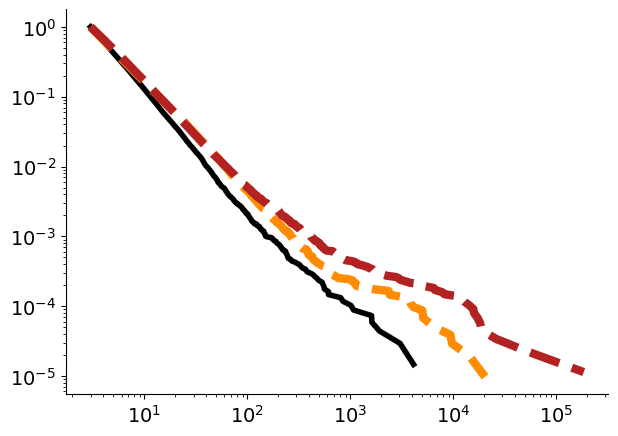

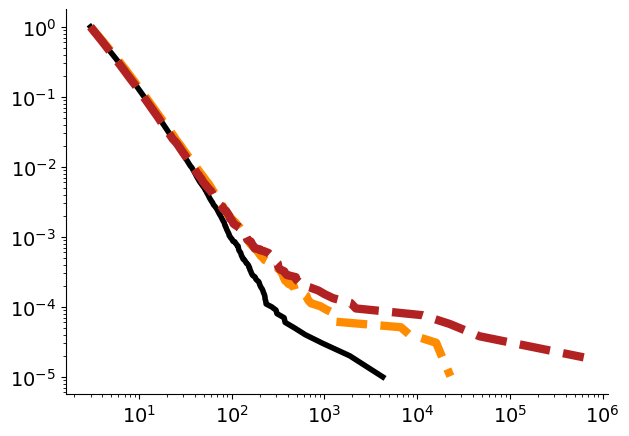

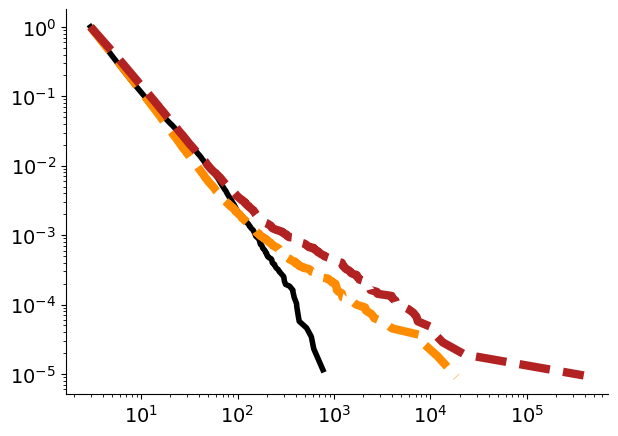

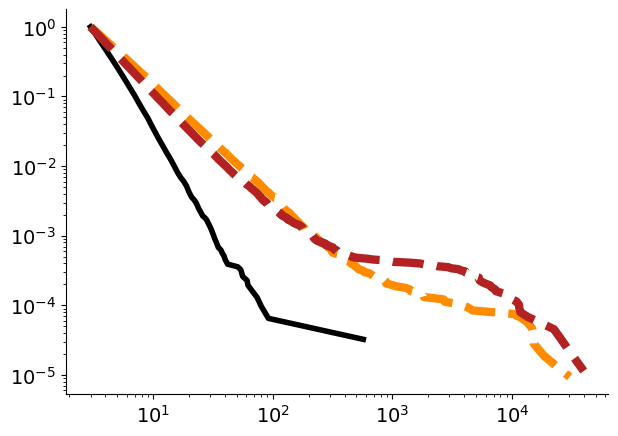

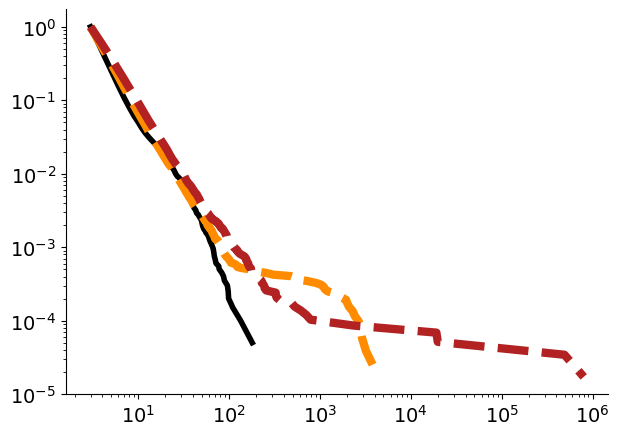

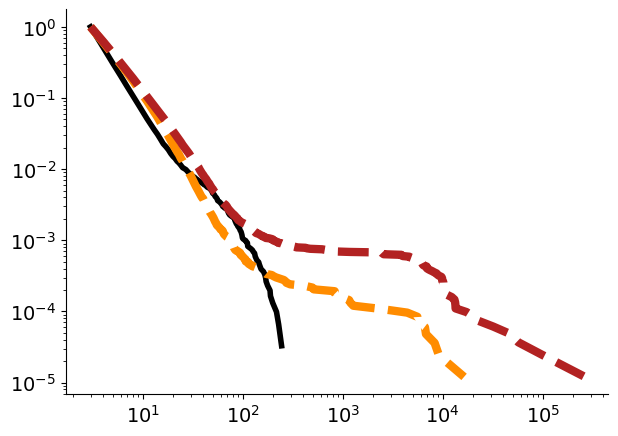

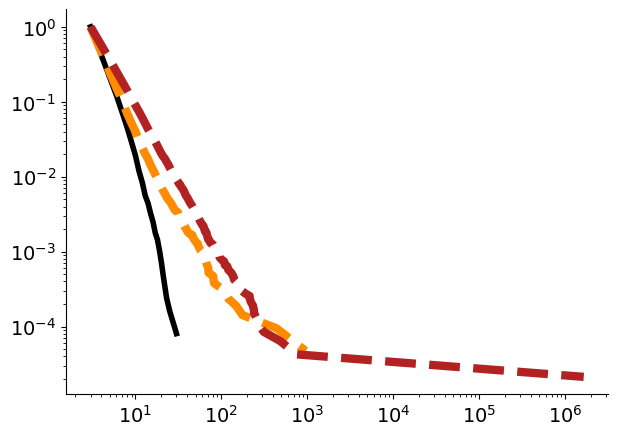

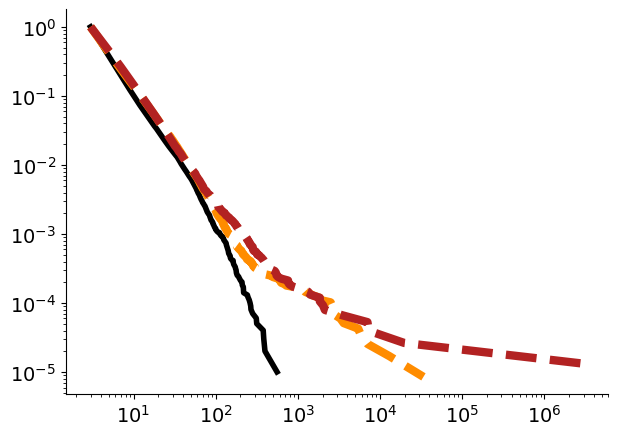

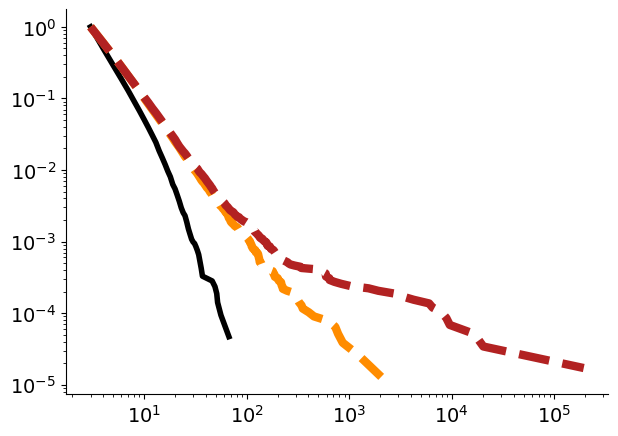

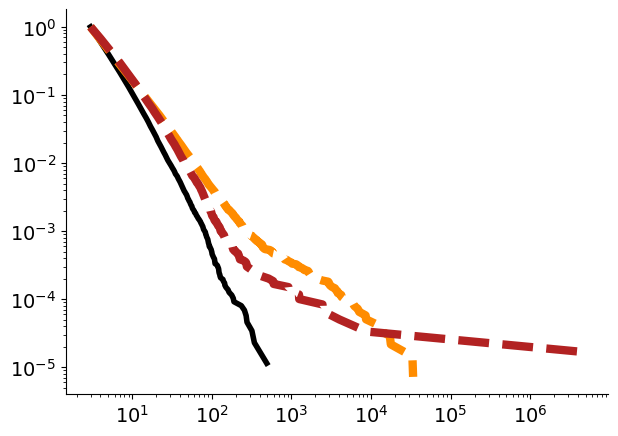

In [374]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','firebrick']
xlabels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']
widths = [4, 6, 6]
lines = ['-', '--', '--']
count = 0
choose=0
for i in num1:
    if i != '03':
        os.chdir(Fdrop + 'Project/' + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
        p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
        p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
        plotlist = [blnlist,p5list,p20list]
        fig, axarr = plt.subplots(figsize = (7,5))
        for e in range(len(plotlist)):
            avdistcut = np.load(plotlist[e][0])[choose]
            powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =widths[e] , markersize = 1, alpha = 1, c = colors[e])
        axarr.set_xscale('log')
        axarr.set_yscale('log')
        axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #plt.xlim(right = 1000000)  
        #plt.ylim(bottom = 0.000005)  
        #axarr.set_title(str(blnlist[0]), size = '13')
        #axarr.set_ylabel('P(S)', size = '13')
        #axarr.set_xlabel('Avalanche size (events)', size = '13')
        axarr.spines['top'].set_visible(False)
        axarr.spines['right'].set_visible(False)
        axarr.set_xticklabels(xlabels, fontsize = 14)
        plt.yticks(fontsize = 14)        
        #
        plt.savefig(Ffig + 'avsize_sz' + str(count) + '.svg', transparent = True)
        count+=1
        plt.show()

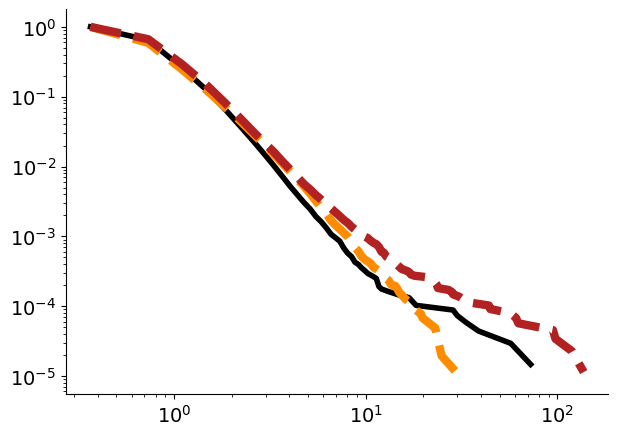

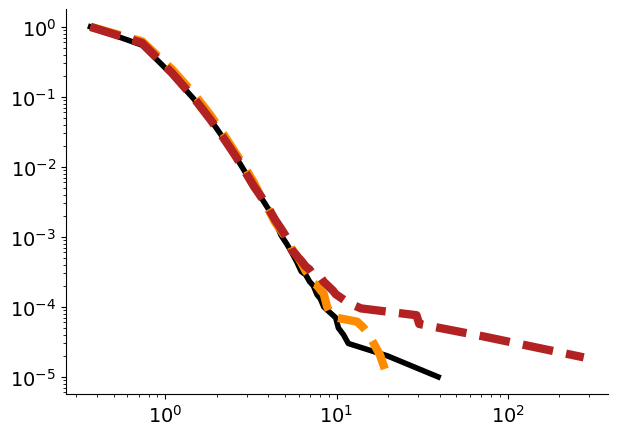

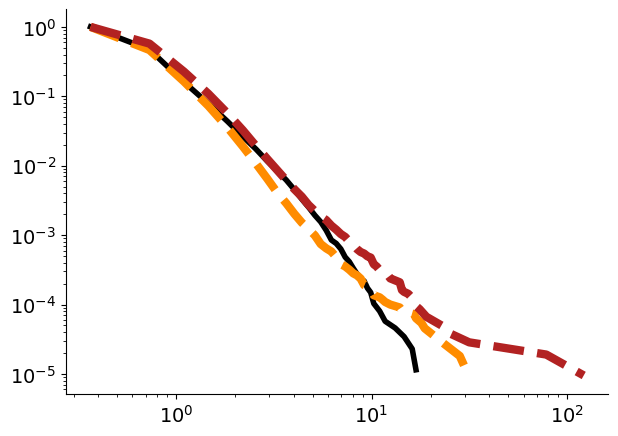

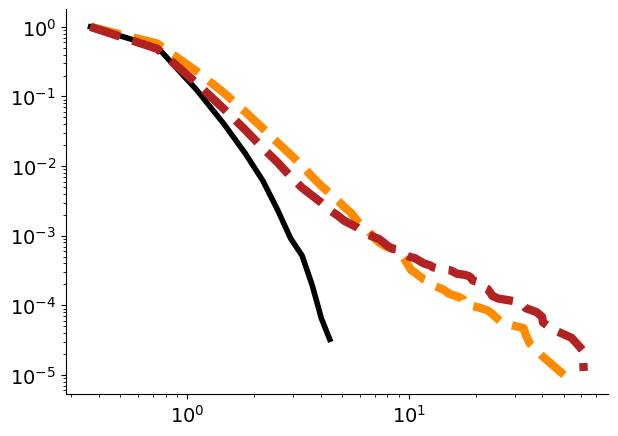

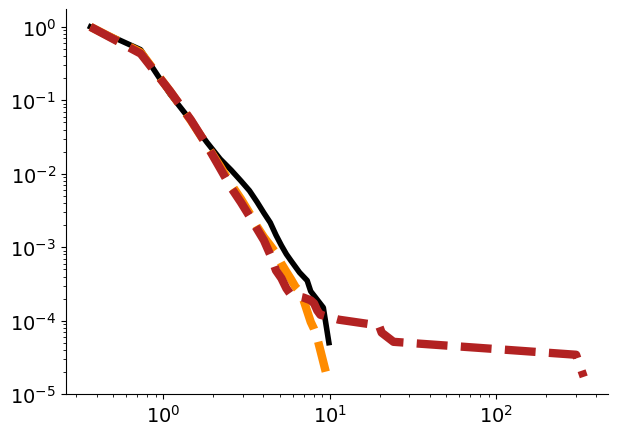

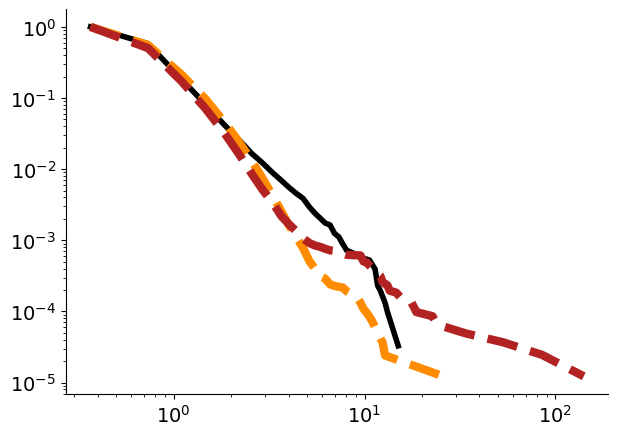

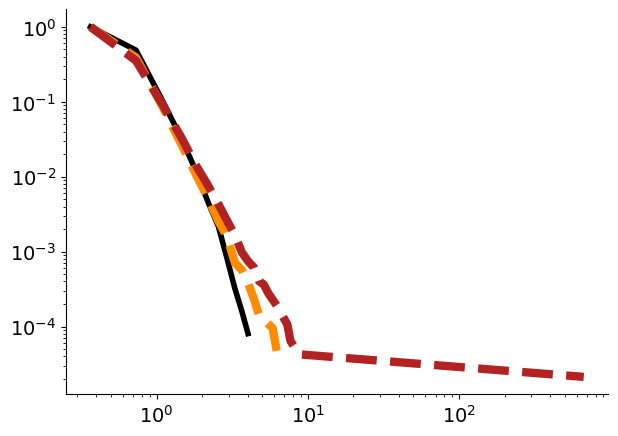

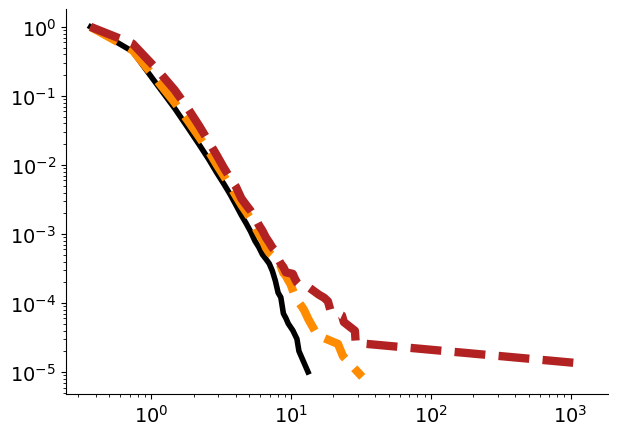

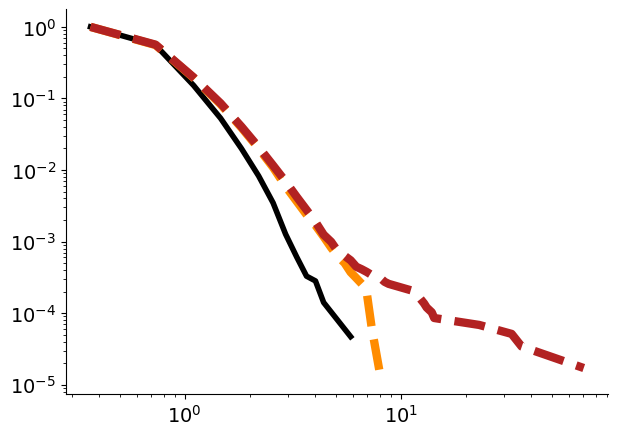

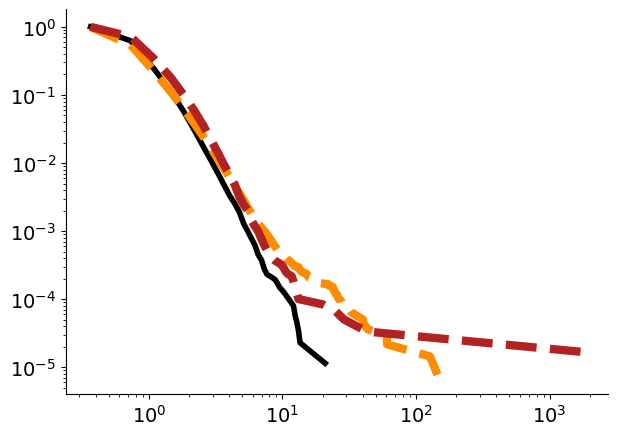

In [376]:
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$','10$^3$']


import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','firebrick']
labels = ['10$^1$','10$^0$','10$^0$','10$^1$', '10$^2$','10$^3$']
widths = [4, 6, 6]
lines = ['-', '--', '--']
count=0
choose=1
for i in num1:
    if i != '03':
        os.chdir(Fdrop + 'Project/' + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
        p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
        p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
        plotlist = [blnlist,p5list,p20list]
        fig, axarr = plt.subplots(figsize = (7,5))
        for e in range(len(plotlist)):
            avdistcut = (1/2.73)*np.load(plotlist[e][0])[choose]
            powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =widths[e] , markersize = 1, alpha = 1, c = colors[e])
        axarr.set_xscale('log')
        axarr.set_yscale('log')
        axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #plt.xlim(right = 1000)  
        #plt.ylim(bottom = 0.00001)  
        #axarr.set_title(str(blnlist[0]), size = '13')
        #axarr.set_ylabel('P(D)', size = '13')
        #axarr.set_xlabel('Avalanche duration (s)', size = '13')
        axarr.spines['top'].set_visible(False)
        axarr.spines['right'].set_visible(False)
        axarr.set_xticklabels(labels, fontsize = 14)
        plt.yticks(fontsize = 14)        
        plt.savefig(Ffig + 'avdur_sz' + str(count) + '.svg', transparent = True)
        count+=1
        plt.show()

## DCC

In [9]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnavlist = sorted(glob.glob('*randbase*av.npy*'))
preavlist = sorted(glob.glob('*pre*av.npy*'))
genavlist = sorted(glob.glob('*_ict*av.npy*'))
blnavlist, preavlist, genavlist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-09_2pho

In [19]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnavlist = sorted(glob.glob('*randbase*av.npy*'))
preavlist = sorted(glob.glob('*pre*av.npy*'))
genavlist = sorted(glob.glob('*_ict*av.npy*'))
blnavlist, preavlist, genavlist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-01_randbase-av.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_preictal-av.npy',
  'PTZ-WILDTYPE-09_2pho

In [20]:
bln_dcc, pre_dcc, gen_dcc = np.zeros((len(blnavlist))), np.zeros((len(blnavlist))), np.zeros((len(blnavlist)))
for i in range(len(blnavlist)):
    bln_dcc[i] = crfn.DCC(np.load(blnavlist[i]))
    pre_dcc[i] = crfn.DCC(np.load(preavlist[i]))
    gen_dcc[i] = crfn.DCC(np.load(genavlist[i]))
    print('Done '+ str(i))

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8


In [34]:
dcc = np.zeros((27))
dcc_list = [bln_dcc, pre_dcc, gen_dcc]
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i)
for e in range(3):
    flist = np.append(flist, fli)
    
count=0
for i in range(len(dcc_list)):
    for y in range(9):
        dcc[count] = dcc_list[i][y]
        count+=1
dcc_df = pd.DataFrame({"DCC":dcc , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre',9),adfn.repeat_list('Gen',9))), "Fish":flist})

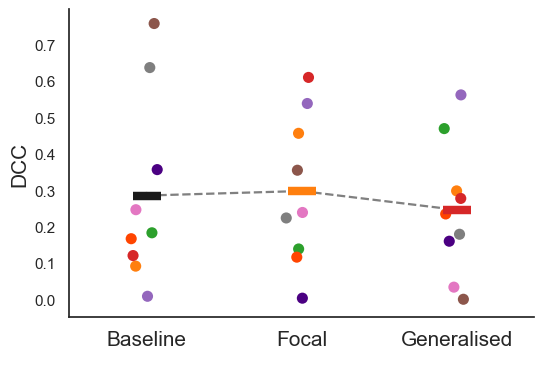

In [36]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['k','#ff7f0e','#d62728']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="DCC", data = dcc_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="DCC", data=dcc_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="DCC", data=dcc_df, hue = 'Fish', palette = colors1, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('DCC', size = '15')
ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.savefig('exp_dur_ptz.svg', transparent = True)
plt.show()

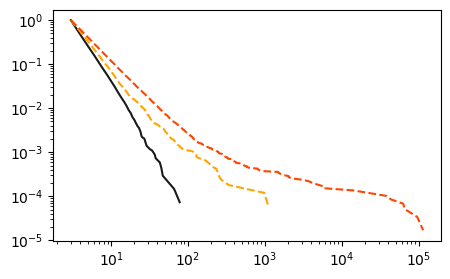

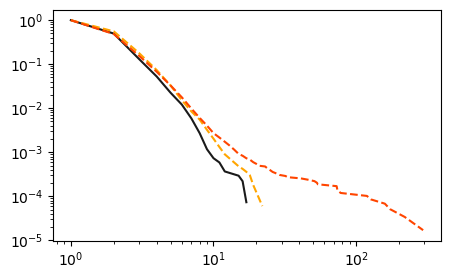

In [44]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_svec = []
pre_svec = []
p20_svec = []
for i in range(len(bln_distlist)):
    bln_svec = np.append(bln_svec, bln_distlist[i])
    pre_svec = np.append(pre_svec, pre_distlist[i])
    p20_svec = np.append(p20_svec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_svec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_svec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_svec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()


choose = 1
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_dvec = []
pre_dvec = []
p20_dvec = []
for i in range(len(bln_distlist)):
    bln_dvec = np.append(bln_dvec, bln_distlist[i])
    pre_dvec = np.append(pre_dvec, pre_distlist[i])
    p20_dvec = np.append(p20_dvec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_dvec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_dvec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_dvec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()

In [50]:
listlist =[np.vstack((bln_svec, bln_dvec)), np.vstack((pre_svec, pre_dvec)), np.vstack((p20_svec, p20_dvec))]
nomlist =['bln', 'pre', 'sz']

for i in range(len(listlist)):
    print(nomlist[i] + ' ' + str(crfn.DCC(listlist[i])))

bln 0.10772388198519067
pre 0.4281751228646593
sz 0.5351096755260398


### Branching ratio
* Branching ratio increases during seizures beyond critical point

In [195]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnbranchlist = sorted(glob.glob('*BLN*_branch*'))
p5branchlist = sorted(glob.glob('*PTZ05*_branch*'))
p20branchlist = sorted(glob.glob('*PTZ20*_branch*'))
blnbranchlist = np.append(blnbranchlist[0], blnbranchlist[2:])
p5branchlist = np.append(p5branchlist[0], p5branchlist[2:])
p20branchlist = np.append(p20branchlist[0], p20branchlist[2:])
blnbranchlist, p5branchlist, p20branchlist

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
        'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy'],
       dtype='<U59'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01__branch.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01__branch.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01__branch.npy',
        'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PT

In [218]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
bln_binlist = sorted(glob.glob('*BLN*binarised*')) 
bln_binlist = np.append(bln_binlist[0], bln_binlist[2:])
p5_binlist = sorted(glob.glob('*PTZ05*_binarised*')) 
p5_binlist = np.append(p5_binlist[0], p5_binlist[2:])
p20_binlist = sorted(glob.glob('*PTZ20*_binarised*')) 
p20_binlist = np.append(p20_binlist[0], p20_binlist[2:])
bln_binlist, p5_binlist, p20_binlist

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_0.590_binarised.npy'],
       dtype='<U67'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-05_

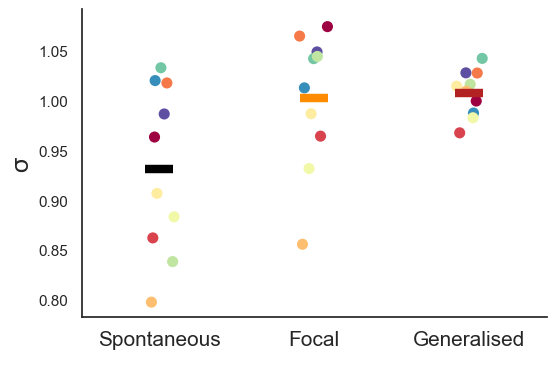

In [35]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,len(blnbranchlist)))
colors2 = ['black','darkorange','firebrick']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="condition", y="branch ratio", data = branchdf, hue = 'condition', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="condition", y="branch ratio", data=branchdf, color = 'k', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf, hue = 'Fish', palette = colors1, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '18')
ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'BR_full.svg', transparent = True)
plt.show()

In [36]:
bln_br = branchdf[branchdf['condition'] == 'baseline']
p5_br = branchdf[branchdf['condition'] == 'PTZ 5mM']
p20_br = branchdf[branchdf['condition'] == 'PTZ 20mM']
br_list = bln_br, p5_br, p20_br

In [37]:
from scipy import stats
data = bln_br['branch ratio']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9310323831499296 0.026644529874785532


In [38]:
from scipy import stats
data = p5_br['branch ratio']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.0026663977600674 0.021803372199152102


In [39]:
from scipy import stats
data = p20_br['branch ratio']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.0076466835260107 0.007322923386211997


In [40]:
for i in range(len(br_list)):
    p = stats.normaltest(br_list[i]['branch ratio'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [43]:
#BLN - PTZ5
alpha = 0.05/3

t, p = stats.ttest_rel(bln_br['branch ratio'], p5_br['branch ratio'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -3.7930602572161547   p = 0.004262562729903708
Samples are significantly different


In [44]:
#BLN - PTZ5
alpha = 0.05/3

t, p = stats.ttest_rel(bln_br['branch ratio'], p20_br['branch ratio'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -3.1108233546761452   p = 0.012502247314211042
Samples are significantly different


In [45]:
#BLN - PTZ5
alpha = 0.05/3

t, p = stats.ttest_rel(p20_br['branch ratio'], p5_br['branch ratio'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 0.2506700714826363   p = 0.807698080083805
Samples are the same


### Connectivity-distance
* compare change in slope in seizure vs baseline

In [384]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tracelist = sorted(glob.glob('*_PTZ*cut*realtrace*')) 
distlist = sorted(glob.glob('*_PTZ*dist.npy*')) 
binlist = sorted(glob.glob('*_corrdist*'))
coordlist = sorted(glob.glob('*_PTZ*realcoord*'))
blnlist = sorted(glob.glob('*BLN*_corrdist_bins*'))
p5list = sorted(glob.glob('*PTZ05*_corrdist_bins*'))
p20list = sorted(glob.glob('*PTZ20*_corrdist_bins*'))

blnlist, p5list, p20list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_corrdist_bins.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_corrdist_bins.npy

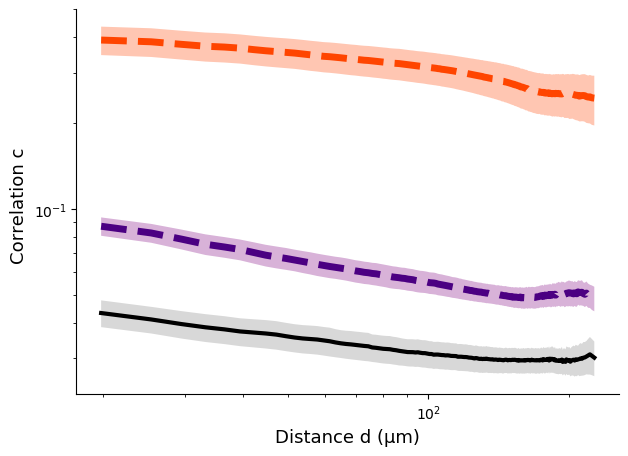

In [387]:
from scipy import stats

bln_distlist = [np.load(blnlist[i])[0] [:189]  for i in range(len(blnlist))]
p5_distlist = [np.load(p5list[i])[0][:189] for i in range(len(p5list))]
p20_distlist = [np.load(p20list[i])[0][:189] for i in range(len(p20list))]

bln_corrlist = [np.load(blnlist[i])[1][:189] for i in range(len(blnlist))]
p5_corrlist = [np.load(p5list[i])[1][:189] for i in range(len(p5list))]
p20_corrlist = [np.load(p20list[i])[1][:189] for i in range(len(p20list))]

mean_dist = np.mean(np.vstack((p20_distlist,np.vstack((np.vstack(p5_distlist), np.vstack(bln_distlist))))), axis= 0)

listlist = bln_corrlist, p5_corrlist, p20_corrlist
colors = ['black', 'indigo','orangered']
facecolors = ['grey', 'purple','orangered']

lines = ['-', '--', '--']
widths = [3, 5, 5]
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(3):
    sem = stats.sem(listlist[i])
    xaxis = mean_dist*0.8
    yaxis = np.mean(listlist[i], axis=0)
    minus = yaxis-(sem)
    plus = yaxis+(sem)

    axarr.fill_between(xaxis[1:len(xaxis)-1], minus[1:len(xaxis)-1], plus[1:len(xaxis)-1],facecolor=facecolors[i],alpha=0.3)
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = widths[i], markersize = 1, alpha = 1, color = colors[i], linestyle = lines[i])

    
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('Distance d (μm)', size = '13')
axarr.set_ylabel('Correlation c ', size = '13')

axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'corrdis_ptz_mean_trans.svg', transparent = True)
plt.show()

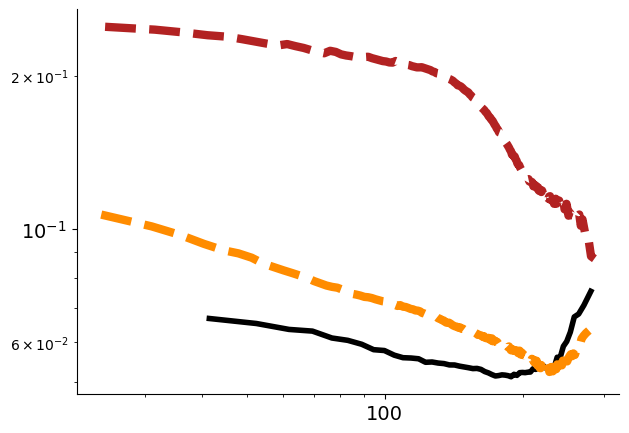

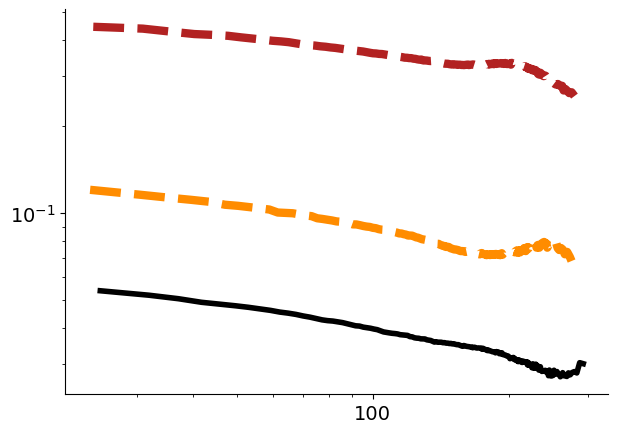

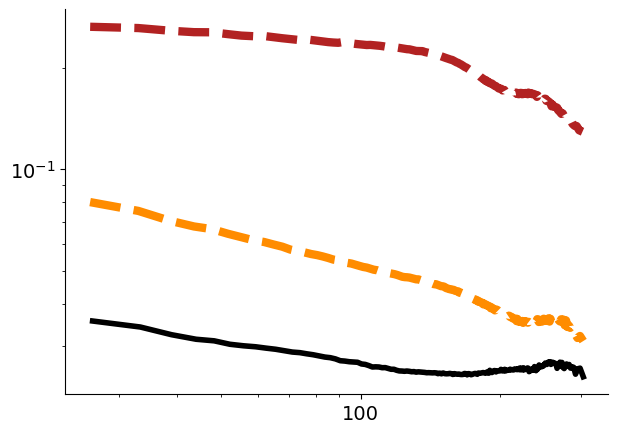

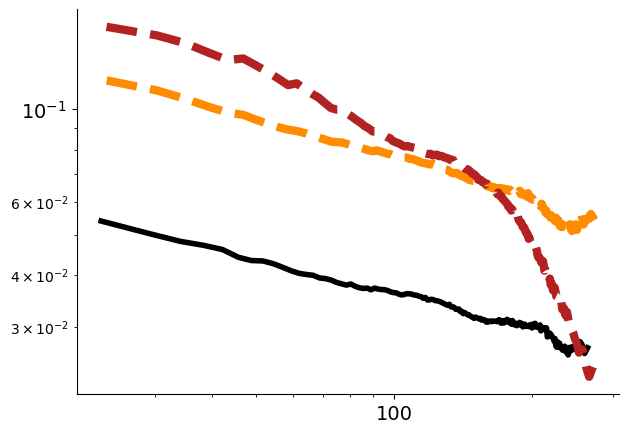

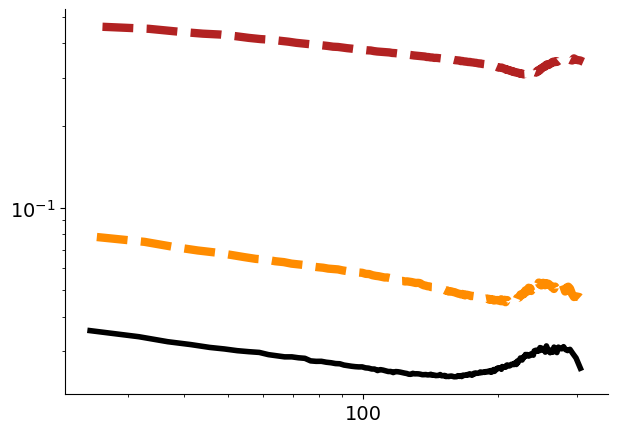

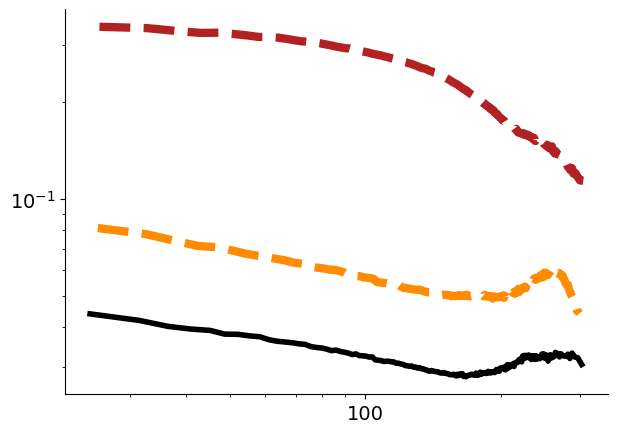

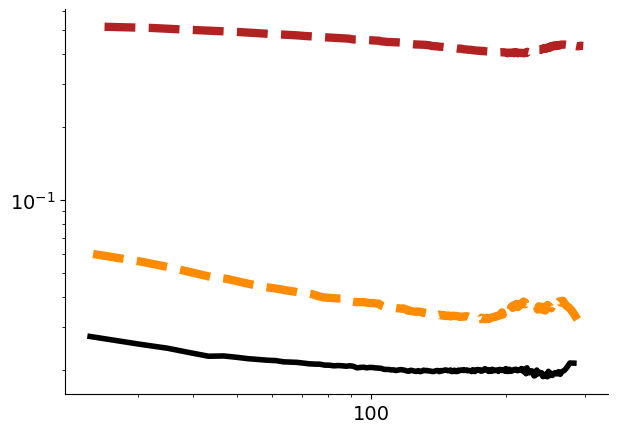

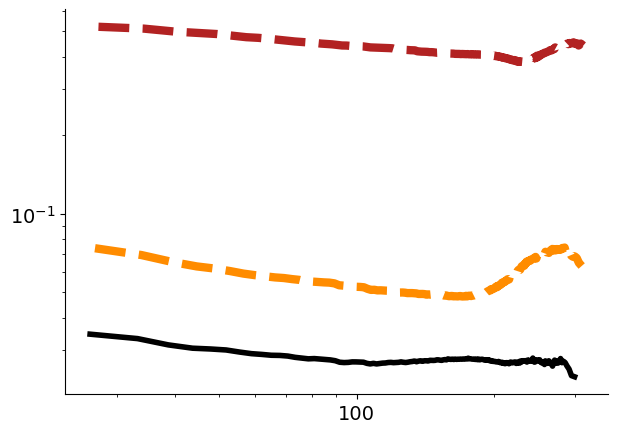

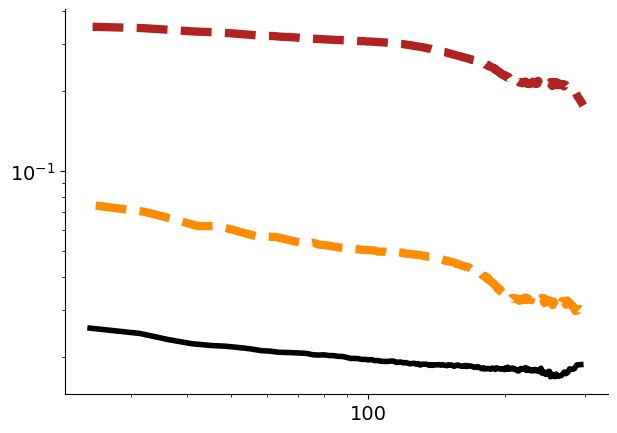

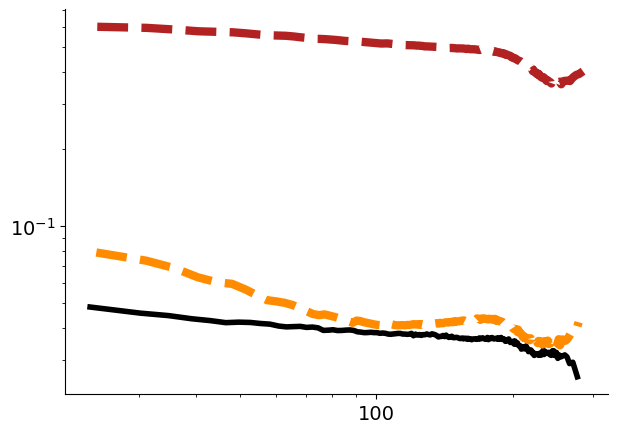

In [380]:
import matplotlib
import powerlaw
sns.reset_orig()
num1 = adfn.name_zero('front',2,12,1)
blnslope, p5slope, p20slope = list(range(10)), list(range(10)), list(range(10))
blncorr, precorr, p20corr = list(range(10)), list(range(10)), list(range(10))

colors = ['black', 'darkorange','firebrick']
lines = ['-', '--', '--']
widths = [4, 6, 6]

count=0
for i in num1:
    if i != '03':
        os.chdir(Fdrop + 'Project/' + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*corrdist_bins*'))
        p5list = sorted(glob.glob('*E-' + i + '*PTZ05*corrdist_bins*'))
        p20list = sorted(glob.glob('*E-' + i + '*PTZ20*corrdist_bins*'))
        plotlist = [blnlist,p5list,p20list]
        slopelist = [blnslope,p5slope,p20slope]
        corrlist = [blncorr,precorr,p20corr]

        fig, axarr = plt.subplots(figsize = (7,5))
        for e in range(len(plotlist)):
            data = np.load(plotlist[e][0])
            xaxis = data[0]
            yaxis = data[1]
            axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = widths[e], markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
            slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:150]),np.log10(yaxis[:len(xaxis)-1][1:150]))[0]
            m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
            y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
            corrlist[e][count] = np.linalg.norm(yaxis[1:]-y_fit) #stats.pearsonr(yaxis[1:], y_fit)[0]
            #axarr.plot(xaxis[1:len(xaxis)-1], y_fit[1:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, color ='k', linestyle = '-')

        count+=1
        axarr.set_xscale('log')
        axarr.set_yscale('log')
        #axarr.set_xlabel('Distance d (μm)', size = '13')
        #axarr.set_ylabel('Correlation c ', size = '13')

        axarr.set_xticklabels(['100', '100', '100', '100'])
        axarr.spines['top'].set_visible(False)
        axarr.spines['right'].set_visible(False)
        plt.yticks(fontsize = 14)
        plt.xticks(fontsize = 14)

        plt.savefig(Ffig + 'corrdist_sz' + str(count) + '.svg', transparent = True)
        plt.show()

In [50]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_corrdist_bins.*'))
p5list = sorted(glob.glob('*PTZ05*_corrdist_bins.*'))
p20list = sorted(glob.glob('*PTZ20*_corrdist_bins.*'))
blnlist = np.append(blnlist[0], blnlist[2:])
p5list = np.append(p5list[0], p5list[2:])
p20list = np.append(p20list[0], p20list[2:])
blnlist, p5list, p20list

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
        'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_corrdist_bins.npy'],
       dtype='<U65'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_corrdist_bins.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_corrdist_bins.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ

In [51]:
#EXPONENT
import pandas as pd

exp = np.zeros((30))
fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('Pre-ictal',10),adfn.repeat_list('Ictal',10))), "Fish":flist})



NameError: name 'slopelist' is not defined

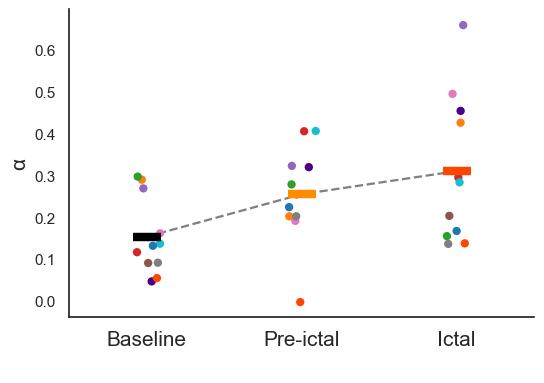

In [144]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data = exdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'Pre-ictal', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [137]:
adfn.ttest(exdf, 'Labels', 'Exponent', ['Baseline', 'Pre-ictal', 'Ictal'], mode='multiple')[0]

[[nan, nan, 0.016666666666666666, 'Not significant', 'Baseline - Baseline'],
 [-2.516277938149752,
  0.030581805744486053,
  0.016666666666666666,
  'Not significant',
  'Baseline - Pre-ictal'],
 [-3.1469652604143143,
  0.010386414390941966,
  0.016666666666666666,
  'Significant',
  'Baseline - Ictal']]

In [56]:
#EUCLIDEAN DISTANCe
import pandas as pd

exp = np.zeros((30))
fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

eu_df = pd.DataFrame({"Distance":np.append(corrlist[0],np.append(corrlist[1], corrlist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('PTZ 5mM',10),adfn.repeat_list('PTZ 20mM',10))), "Fish":flist})

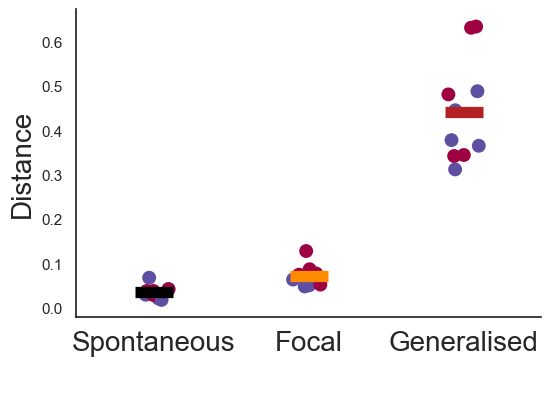

In [57]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=4, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Distance", data = eu_df, hue = 'Fish', palette = colors1, size = 10, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '18')
ax.set_ylabel('Distance', size = '20')
ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 20)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.savefig(Ffig + 'corrdist_eu.svg', transparent = True)
plt.show()

In [58]:
bln_cd = eu_df[eu_df['Labels'] == 'Baseline']
p5_cd = eu_df[eu_df['Labels'] == 'PTZ 5mM']
p20_cd = eu_df[eu_df['Labels'] == 'PTZ 20mM']

cd_list = bln_cd, p5_cd, p20_cd

In [59]:
from scipy import stats
data = bln_cd['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.03531171857735874 0.004427647462494652


In [60]:
from scipy import stats
data = p5_cd['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.07073042084711262 0.007450284409446908


In [61]:
from scipy import stats
data = p20_cd['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.44182993883103217 0.03692997313922427


In [62]:
for i in range(len(cd_list)):
    p = stats.normaltest(cd_list[i]['Distance'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [64]:
#BLN - PTZ5
alpha = 0.05/3

t, p = stats.ttest_rel(bln_cd['Distance'], p5_cd['Distance'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -3.991478113658599   p = 0.0031506920209885153
Samples are significantly different


In [65]:
#BLN - PTZ20
alpha = 0.05/3

t, p = stats.ttest_rel(bln_cd['Distance'], p20_cd['Distance'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -11.333027111175074   p = 1.2513317060048463e-06
Samples are significantly different


In [66]:
#BLN - PTZ20
alpha = 0.05/3

t, p = stats.ttest_rel(p5_cd['Distance'], p20_cd['Distance'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -9.96135868544363   p = 3.695392715719808e-06
Samples are significantly different


In [313]:
# Create lists of bin
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_randbase-corrdist_bins.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_preictal-corrdist_bins.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_preictal-corrdist_bins.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_preictal-corrdist_bins.npy',
  'PTZ-WILDTYPE-07_2photon_sess-0

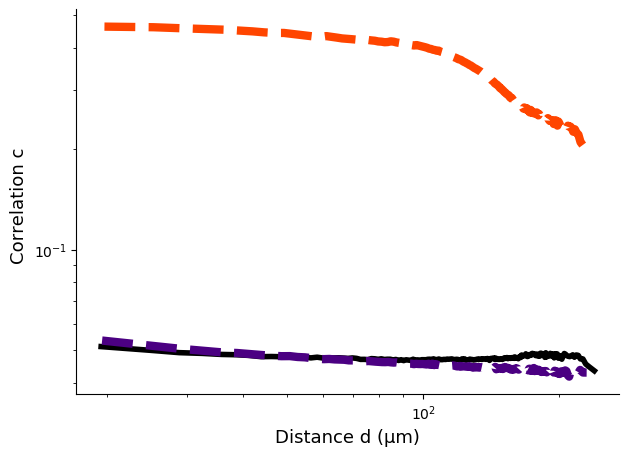

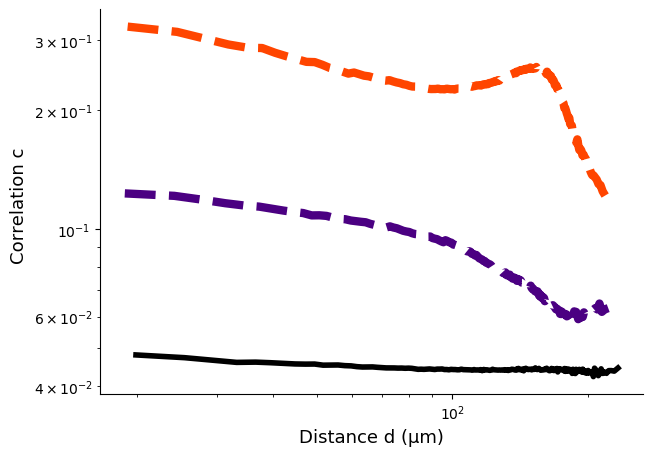

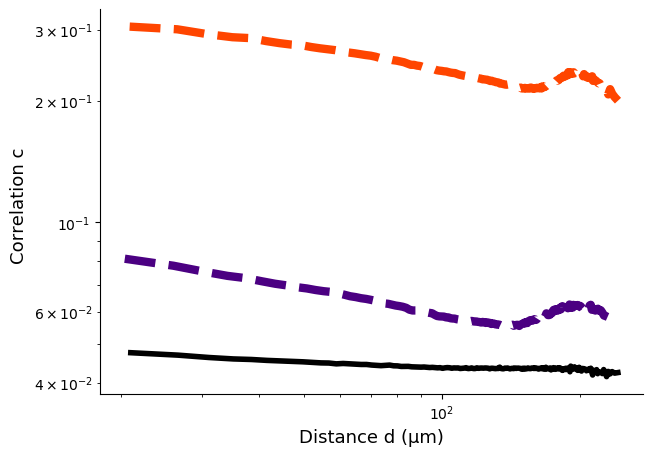

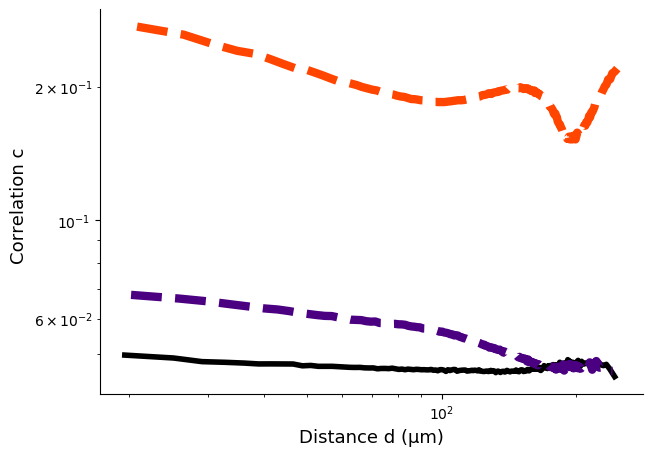

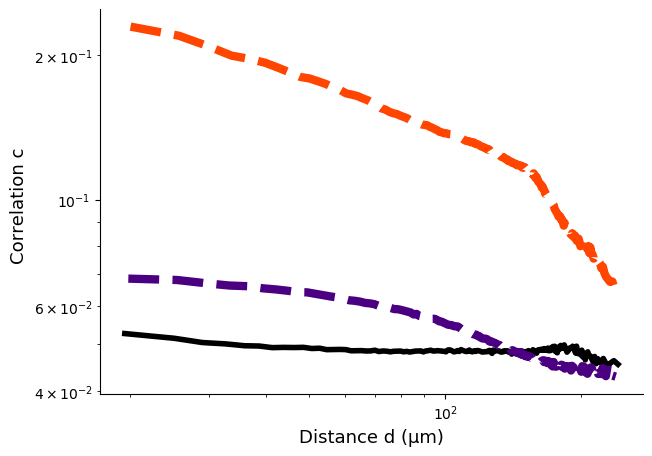

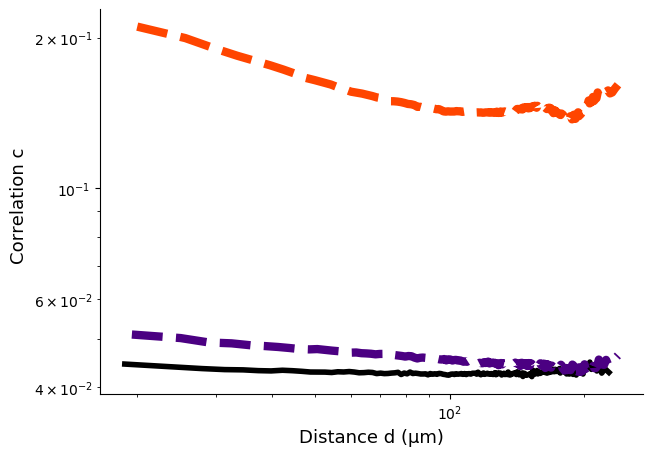

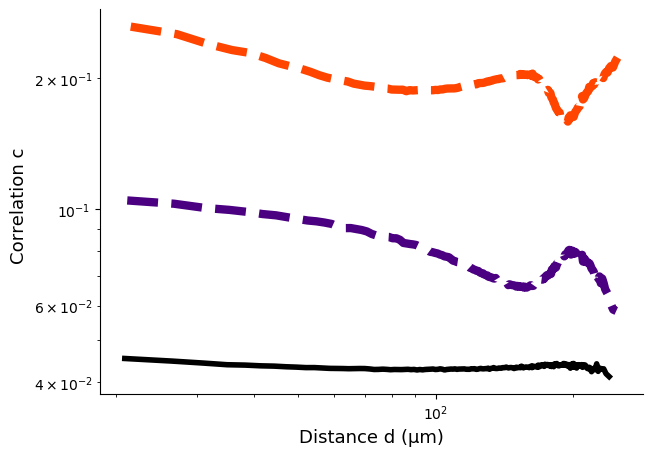

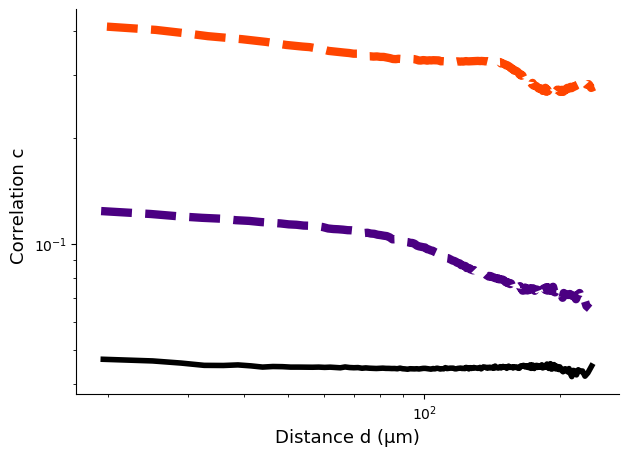

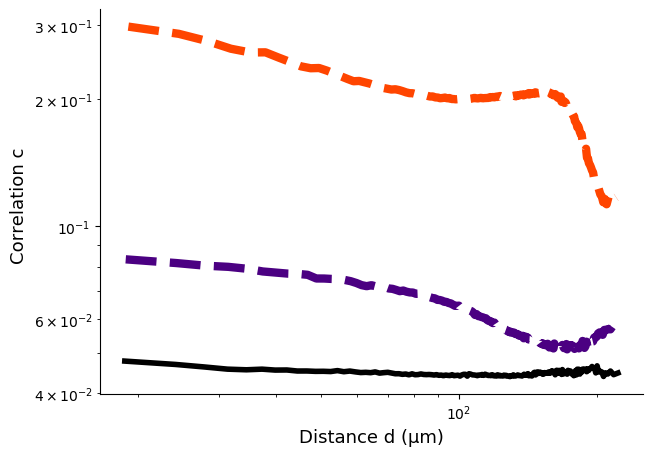

In [315]:
import matplotlib
import powerlaw
from scipy import stats
sns.reset_orig()
num1 = ['02', '04', '05', '07', '08', '09', '10', '11', '12']

blnslope, preslope, p20slope = list(range(9)), list(range(9)), list(range(9))
blncorr, precorr, p20corr = list(range(9)), list(range(9)), list(range(9))

colors = ['black', 'indigo','orangered']
lines = ['-', '--', '--']
widths = [4, 6, 6]
count=0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*randbase*-corrdist_bins*'))
    p5list = sorted(glob.glob('*E-' + i + '*preictal*-corrdist_bins*'))
    p20list = sorted(glob.glob('*E-' + i + '*_ictal*-corrdist_bins*'))
    slopelist = [blnslope,preslope,p20slope]
    corrlist = [blncorr,precorr,p20corr]


    plotlist = [blnlist,p5list,p20list]
    fig, axarr = plt.subplots(figsize = (7,5))

    for e in range(len(plotlist)):
        data = np.load(plotlist[e][0])
        xaxis = data[0]*0.8
        yaxis = data[1]
        axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = widths[e], markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:150]),np.log10(yaxis[:len(xaxis)-1][1:150]))[0]
        m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
        y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
        #axarr.plot(xaxis[1:len(xaxis)-1], y_fit[1:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, color ='k', linestyle = '-')
        corrlist[e][count] = np.linalg.norm(yaxis[1:]-y_fit) #stats.pearsonr(yaxis[1:], y_fit)[0]



    count+=1
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_xlabel('Distance d (μm)', size = '13')
    axarr.set_ylabel('Correlation c ', size = '13')

    #axarr.set_xticklabels(['100', '100', '100', '100'])
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.savefig(Ffig + 'corrdist_sz_trans' + str(count) + '.svg', transparent = True)
    plt.show()

In [279]:
#EXPONENT
import pandas as pd
exp = np.zeros((27))
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})

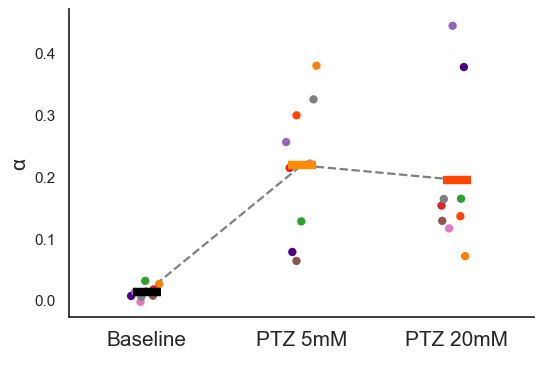

In [280]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data = exdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [150]:
adfn.ttest(exdf, 'Labels', 'Exponent', ['Baseline', 'Pre-ictal', 'Ictal'], mode='multiple')[0]

[[nan, nan, 0.016666666666666666, 'Not significant', 'Baseline - Baseline'],
 [-5.636310344307003,
  0.0004891330785620924,
  0.016666666666666666,
  'Significant',
  'Baseline - Pre-ictal'],
 [-4.234916559175666,
  0.0028571691663762393,
  0.016666666666666666,
  'Significant',
  'Baseline - Ictal']]

In [317]:
blnlist = sorted(glob.glob('*BLN*_corrdist_bins*'))
blnlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_corrdist_bins.npy']

In [ ]:
1, 4

In [312]:
#EUCLIDEAN DISTANCe
import pandas as pd

exp = np.zeros((27))
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

eu_df = pd.DataFrame({"Distance":np.append(corrlist[0],np.append(corrlist[1], corrlist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})

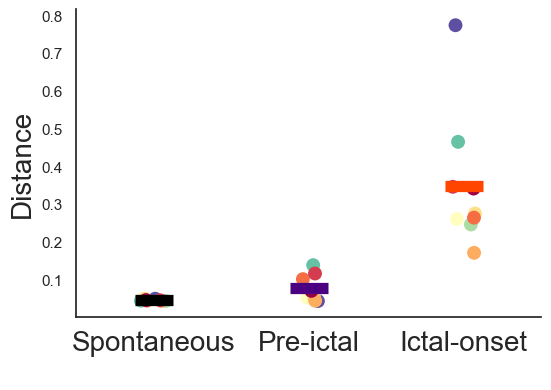

In [338]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))

colors2 = ['black', 'indigo','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=4, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Distance", data = eu_df, hue = 'Fish', palette = new_colors, size = 10, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Distance', size = '20')
ax.set_xticklabels(['Spontaneous', 'Pre-ictal', 'Ictal-onset'], size = 20)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.savefig(Ffig + 'corrdist_eu_trans.svg', transparent = True)
plt.show()

In [231]:
bln_cd = eu_df[eu_df['Labels'] == 'Baseline']
pre_cd = eu_df[eu_df['Labels'] == 'Pre-ictal']
sz_cd = eu_df[eu_df['Labels'] == 'Ictal']

cd_list = bln_cd, pre_cd, sz_cd

In [232]:
from scipy import stats
data = bln_cd['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.04548104300387322 0.000804273211234342


In [233]:
from scipy import stats
data = pre_cd['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.07657051174613637 0.01133879825689177


In [234]:
from scipy import stats
data = sz_cd['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.34869710876349425 0.05971218938886629


In [235]:
for i in range(len(cd_list)):
    p = stats.normaltest(cd_list[i]['Distance'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [239]:
#BLN - Pre
alpha = 0.05/2

t, p = stats.ttest_rel(bln_cd['Distance'], pre_cd['Distance'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -2.6387817267234497   p = 0.029769569715983758
Samples are the same


In [238]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_cd['Distance'], sz_cd['Distance'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 0.0   p = 0.00390625
Samples are significantly different


### Eigenspectrum
* change in slope in seizure vs baseline
* behaviour dimensionality collapse

In [67]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
p5pcv = sorted(glob.glob('*PTZ05*pcavar.npy'))
p20pcv = sorted(glob.glob('*PTZ20*pcavar.npy'))

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


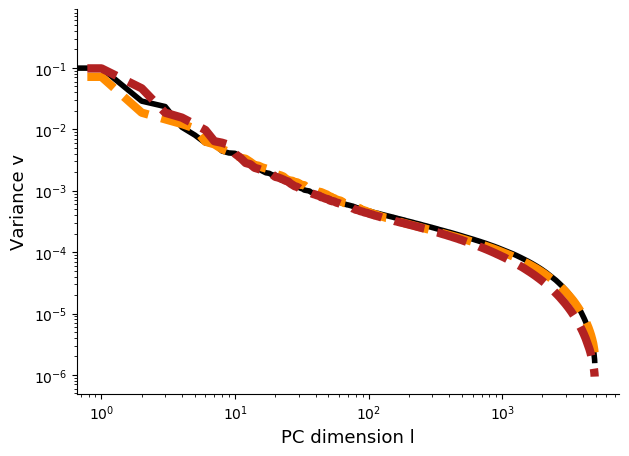

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


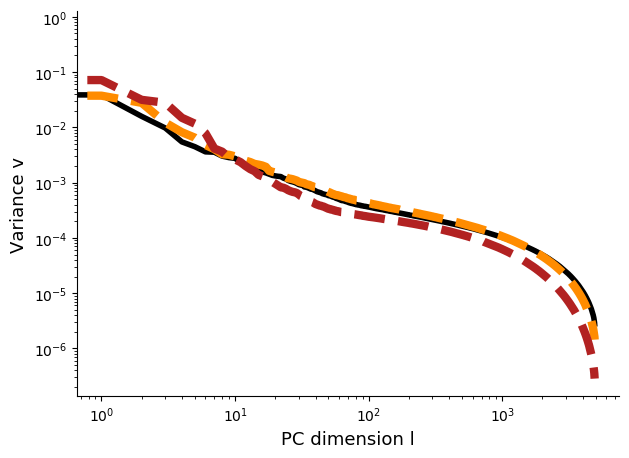

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


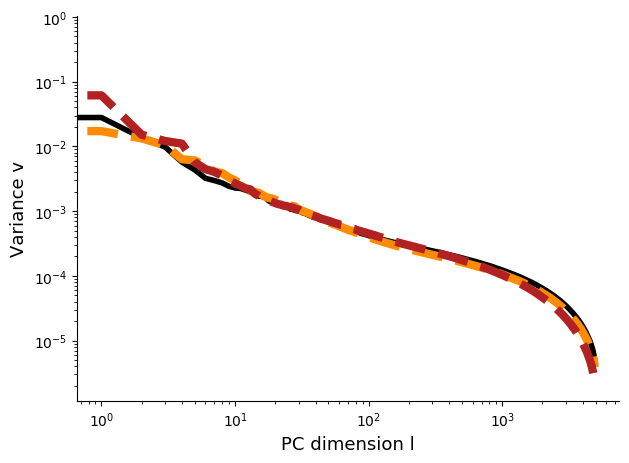

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


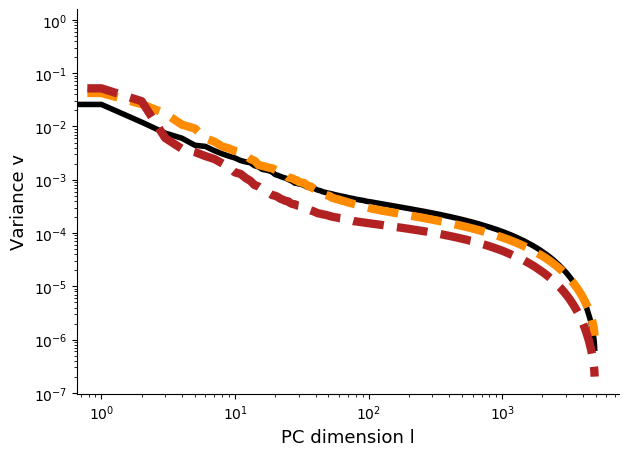

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


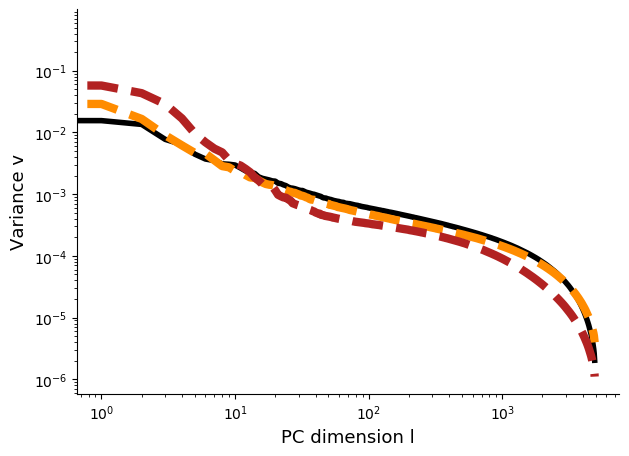

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


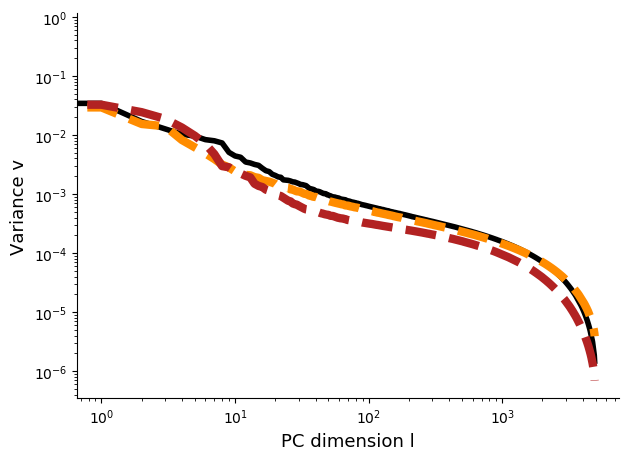

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


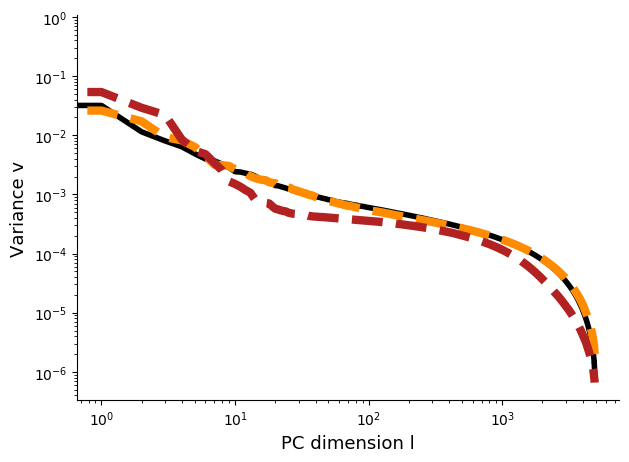

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


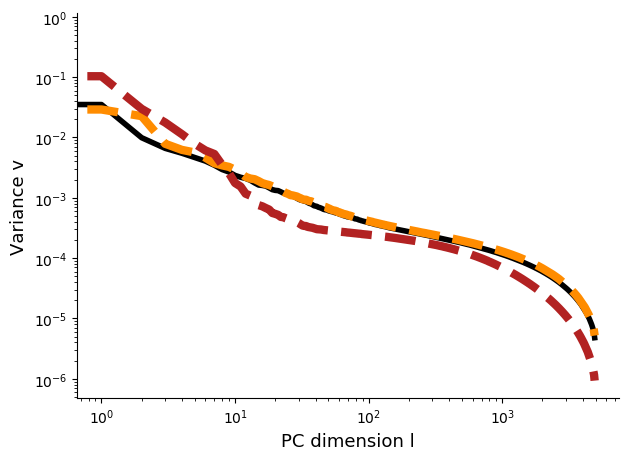

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


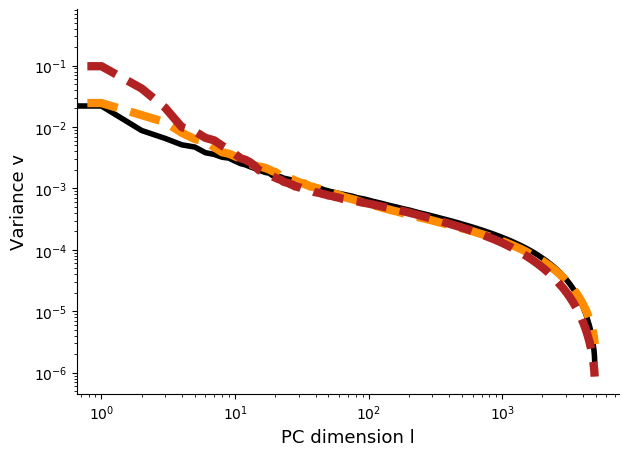

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


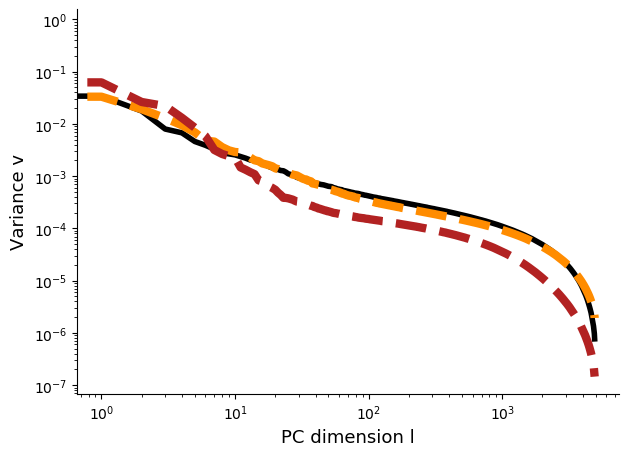

In [69]:
import matplotlib
import powerlaw
sns.reset_orig()
num1 = adfn.name_zero('front',2,12,1)
labels = ['10$^0$','10$^1$','10$^0$','10$^1$','10$^2$','10$^3$']


blnslope, p5slope, p20slope = list(range(10)), list(range(10)), list(range(10))
blncorr, precorr, p20corr = list(range(10)), list(range(10)), list(range(10))

colors = ['black', 'darkorange','firebrick']
lines = ['-', '--', '--']
widths = [4, 6, 6]

count=0
for i in num1:
    if i != '03':
        os.chdir(Fdrop + 'Project/' + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_pcavar.npy*'))
        p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_pcavar.npy*'))
        p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_pcavar.npy*'))
        plotlist = [blnlist,p5list,p20list]
        slopelist = [blnslope,p5slope,p20slope]
        corrlist = [blncorr,precorr,p20corr]
        fig, axarr = plt.subplots(figsize = (7,5))
        for e in range(len(plotlist)):
            data = np.load(plotlist[e][0])
            xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
            yaxis = data
            axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = widths[e], markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
            slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
            m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
            y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
            corrlist[e][count] = np.linalg.norm(yaxis[1:]-y_fit[1:]) #stats.pearsonr(yaxis[1:], y_fit)[0]

        count+=1
        axarr.set_xscale('log')
        axarr.set_yscale('log')
        axarr.set_ylabel('Variance v', size = '13')
        axarr.set_xlabel('PC dimension l', size = '13')
        axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        axarr.spines['top'].set_visible(False)
        axarr.spines['right'].set_visible(False)
        axarr.set_xticklabels(labels)

        #plt.savefig(Ffig + 'eigspec_sz' + str(count) + '.svg', transparent = True)
        plt.show()

In [70]:
#EXPONENT
exp = np.zeros((30))
fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('PTZ 5mM',10),adfn.repeat_list('PTZ 20mM',10))), "Fish":flist})

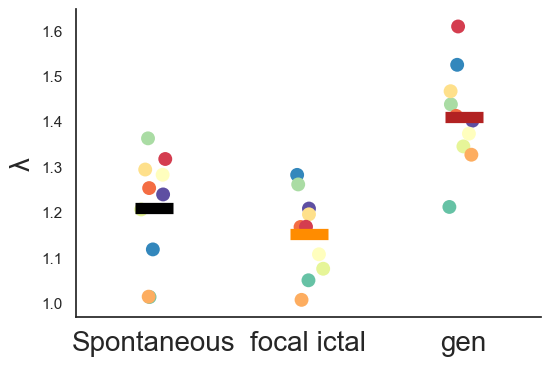

In [71]:
from matplotlib import cm
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnpcv)))
#new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))

colors2 = ['black', 'darkorange','firebrick']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=4, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data = exdf, hue = 'Fish', palette = colors1, size = 10, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('λ', size = '20')
ax.set_xticklabels(['Spontaneous', 'focal ictal', 'gen'], size = 20)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
#plt.savefig(Ffig + 'eig_exp_sz.svg', transparent = True)
plt.show()

In [72]:
bln_exp = exdf[exdf['Labels'] == 'Baseline']
foc_exp = exdf[exdf['Labels'] == 'PTZ 5mM']
gen_exp = exdf[exdf['Labels'] == 'PTZ 20mM']

cd_list = bln_exp, foc_exp, gen_exp

In [73]:
from scipy import stats
data = bln_exp['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.209375090797737 0.038782897878834384


In [74]:
from scipy import stats
data = foc_exp['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.1515878088966225 0.028604107828698936


In [75]:
from scipy import stats
data = gen_exp['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.4100907817701143 0.034745605922581184


In [76]:
for i in range(len(cd_list)):
    p = stats.normaltest(cd_list[i]['Exponent'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [77]:
#BLN - Pre
alpha = 0.05/2

t, p = stats.ttest_rel(bln_exp['Exponent'], foc_exp['Exponent'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 1.795112279046558   p = 0.10620889846038792
Samples are the same


In [78]:
#BLN - Pre
alpha = 0.05/2

t, p = stats.ttest_rel(bln_exp['Exponent'], gen_exp['Exponent'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -6.053098379643438   p = 0.00018976793033941296
Samples are significantly different


In [15]:
#EUCLIDEAN DISTANCe
import pandas as pd

exp = np.zeros((33))
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

eu_df = pd.DataFrame({"Distance":np.append(corrlist[0],np.append(corrlist[1], corrlist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',11),np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11))), "Fish":flist})

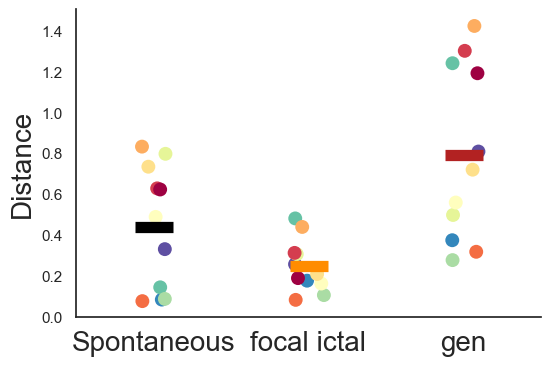

In [17]:
from matplotlib import cm
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnpcv)))
#new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))

colors2 = ['black', 'darkorange','firebrick']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=4, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Distance", data = eu_df, hue = 'Fish', palette = colors1, size = 10, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Distance', size = '20')
ax.set_xticklabels(['Spontaneous', 'focal ictal', 'gen'], size = 20)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.savefig(Ffig + 'eig_eu_sz.svg', transparent = True)
plt.show()

In [39]:
bln_eu = eu_df[eu_df['Labels'] == 'Baseline']
foc_eu = eu_df[eu_df['Labels'] == 'PTZ 5mM']
gen_eu = eu_df[eu_df['Labels'] == 'PTZ 20mM']

cd_list = bln_eu, foc_eu, gen_eu
cd_list

(    Distance    Labels Fish
 0   0.330661  Baseline   F2
 1   0.084126  Baseline   F3
 2   0.144012  Baseline   F4
 3   0.087353  Baseline   F5
 4   0.796510  Baseline   F6
 5   0.488162  Baseline   F7
 6   0.733483  Baseline   F8
 7   0.831678  Baseline   F9
 8   0.076541  Baseline  F10
 9   0.627653  Baseline  F11
 10  0.622243  Baseline  F12,
     Distance   Labels Fish
 11  0.256915  PTZ 5mM   F2
 12  0.176486  PTZ 5mM   F3
 13  0.480773  PTZ 5mM   F4
 14  0.106000  PTZ 5mM   F5
 15  0.306186  PTZ 5mM   F6
 16  0.162511  PTZ 5mM   F7
 17  0.208909  PTZ 5mM   F8
 18  0.439098  PTZ 5mM   F9
 19  0.082706  PTZ 5mM  F10
 20  0.312315  PTZ 5mM  F11
 21  0.189029  PTZ 5mM  F12,
     Distance    Labels Fish
 22  0.807649  PTZ 20mM   F2
 23  0.374221  PTZ 20mM   F3
 24  1.239301  PTZ 20mM   F4
 25  0.277017  PTZ 20mM   F5
 26  0.497536  PTZ 20mM   F6
 27  0.558469  PTZ 20mM   F7
 28  0.719027  PTZ 20mM   F8
 29  1.421439  PTZ 20mM   F9
 30  0.317684  PTZ 20mM  F10
 31  1.299844  PTZ 20mM 

In [41]:
from scipy import stats
data = bln_eu['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.4384019577707525 0.09145459619659867


In [42]:
from scipy import stats
data = foc_eu['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.24735704988529414 0.038519577254242876


In [43]:
from scipy import stats
data = gen_eu['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.7911385205931419 0.12878380257282057


In [45]:
for i in range(len(cd_list)):
    p = stats.normaltest(cd_list[i]['Distance'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [46]:
#BLN - Pre
alpha = 0.05/2

t, p = stats.ttest_rel(bln_eu['Distance'], foc_eu['Distance'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 2.2555352838296603   p = 0.04772900728833358
Samples are the same


In [47]:
#BLN - Pre
alpha = 0.05/2

t, p = stats.ttest_rel(bln_eu['Distance'], gen_eu['Distance'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -3.0683552021901876   p = 0.01187407481761003
Samples are significantly different


# Null models
* Null 1 - shuffle all - does a completely stochastic system generate avalanches?
* Null 2 - neighbour swap - is the spatial structure of cells important for generating critical avalanche dynamics?
* Null 3 - temporal shuffle - is the temporal structure important/signal memory? 

In [349]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
space_list = sorted(glob.glob('*BLN*_swap*av*'))
auto_list = sorted(glob.glob('*BLN*_auto*av*'))
corr_list = sorted(glob.glob('*BLN*_slide*av*'))

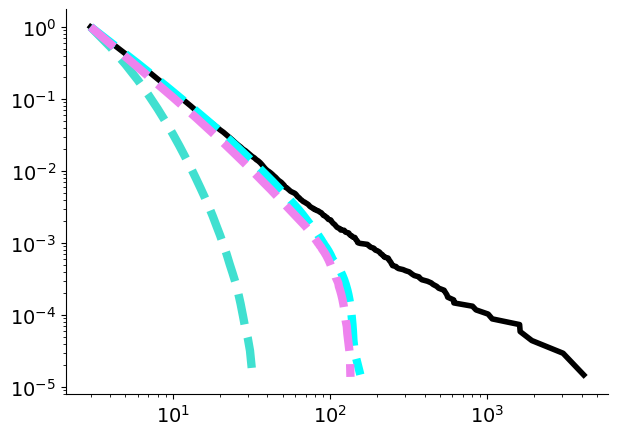

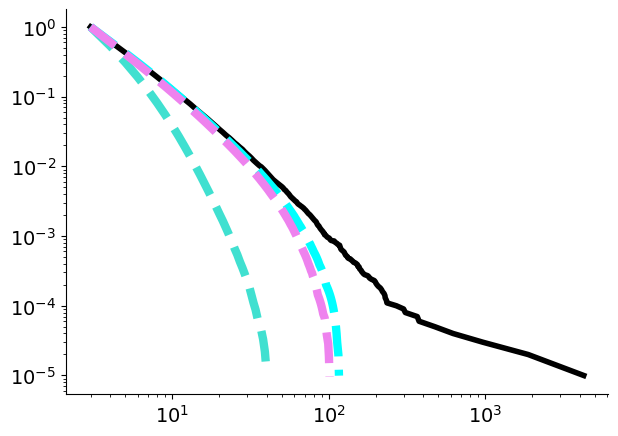

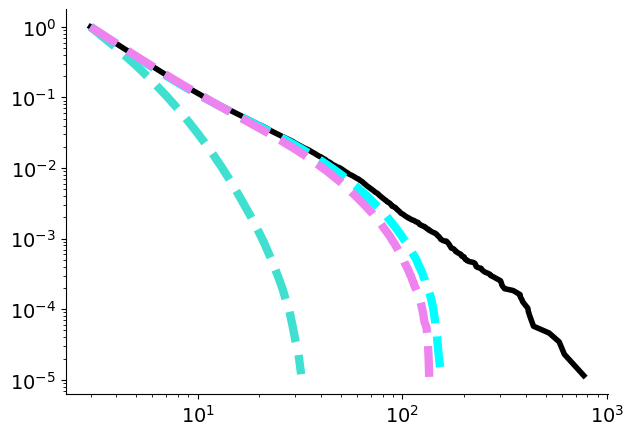

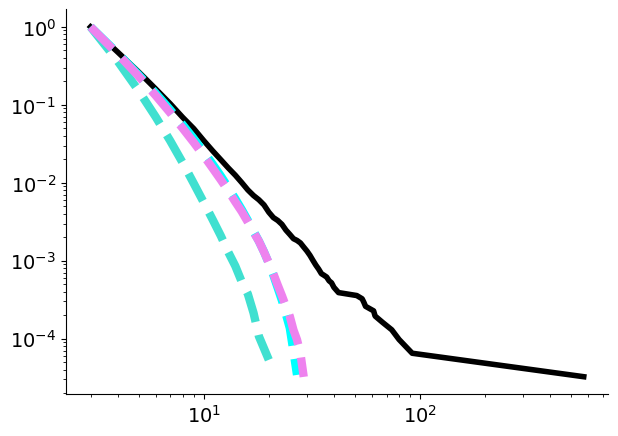

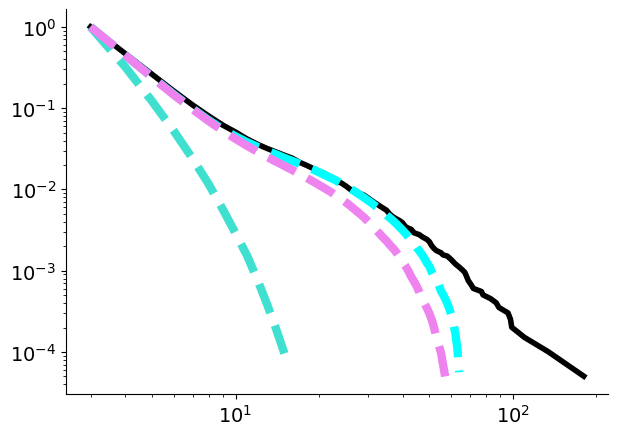

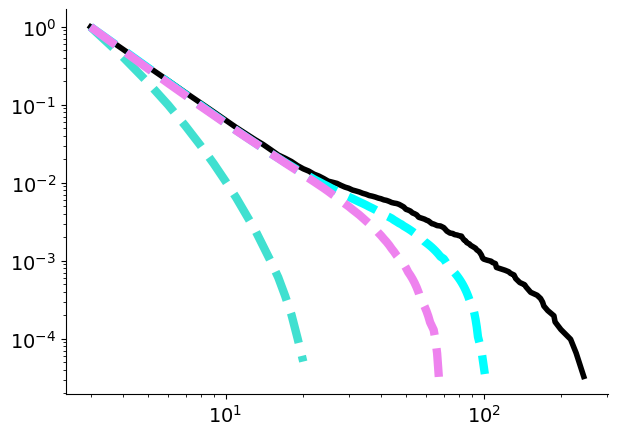

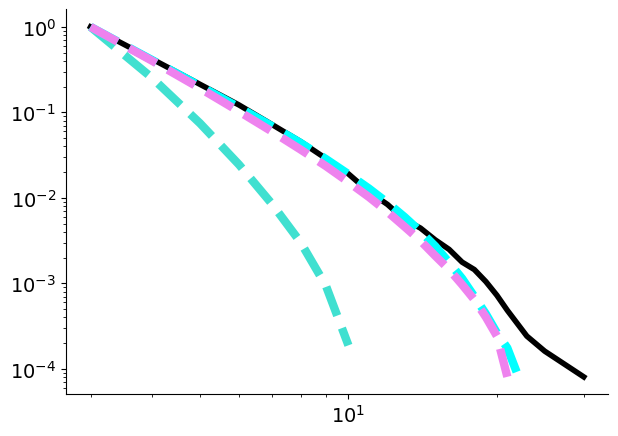

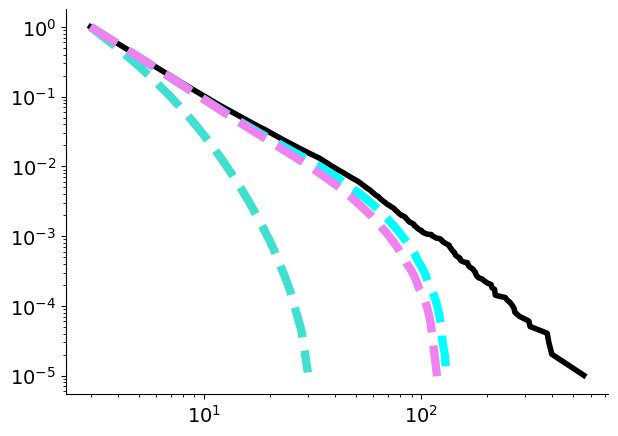

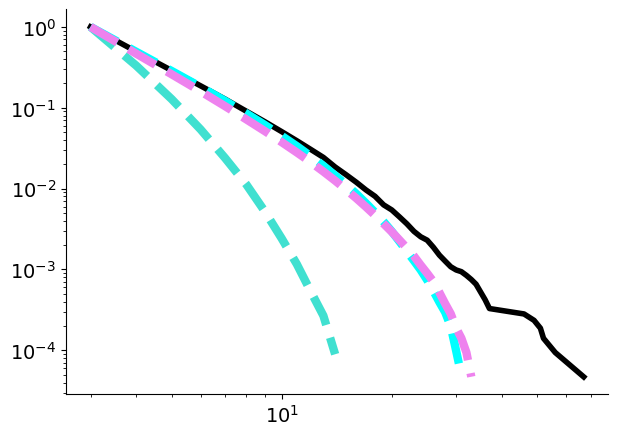

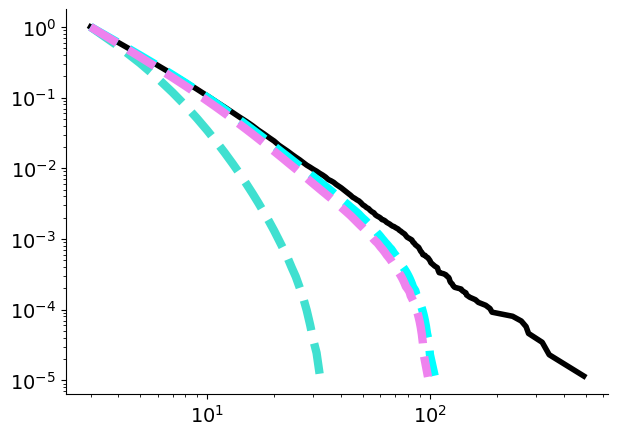

In [364]:
xlabels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']


def getsize(distlist, choose):
    output_list = list(range(len(distlist)))
    for i in range(len(distlist)):
        output_list[i] = np.load(distlist[i])[choose]
    return(output_list)

sns.reset_orig()
import matplotlib
import powerlaw
colors = ['black', 'turquoise','cyan', 'violet']

num1 = adfn.name_zero('front',2,12,1)

choose=0
count = 0
for i in num1:
    if i != '03':
        os.chdir(F10t + 'Project/' + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
        space_list = sorted(glob.glob('*E-' + i + '*BLN*swap*av*'))
        corr_list = sorted(glob.glob('*E-' + i + '*BLN*slide*av*'))
        auto_list = sorted(glob.glob('*E-' + i + '*BLN*auto*av*'))

        fig, axarr = plt.subplots(figsize = (7,5))
        avdistcut = np.load(blnlist[0])[choose]
        powerlaw.plot_ccdf(avdistcut,  linewidth = 4, markersize = 1, alpha = 1, c = colors[0])

        nulist = [space_list, corr_list, auto_list]

        for e in range(len(nulist)):
            inp = getsize(nulist[e], choose)
            mean_null = adfn.mean_distribution(inp)
            powerlaw.plot_ccdf(mean_null,  linewidth = 6, markersize = 1, alpha = 1, c = colors[e+1], linestyle = '--')

        axarr.set_xscale('log')
        axarr.set_yscale('log')
        axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #plt.ylim(bottom = 0.00001)  
        #plt.xlim(right = 5000)  
        #axarr.set_title(str(blnlist[0]), size = '13')
        #axarr.set_ylabel('P(S)', size = '13')
        #axarr.set_xlabel('Avalanche size (events)', size = '13')
        axarr.spines['top'].set_visible(False)
        axarr.spines['right'].set_visible(False)
        axarr.set_xticklabels(xlabels, fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.savefig(Ffig + 'avsize_null_dist' + str(count) + '.svg', transparent = True)
        count+=1
        plt.show()

In [366]:
10**2

100

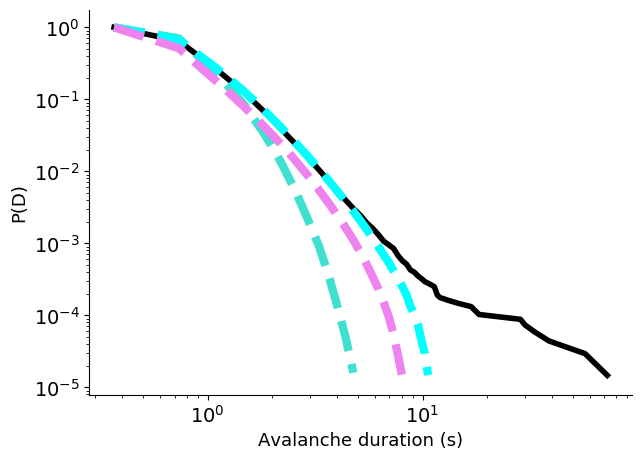

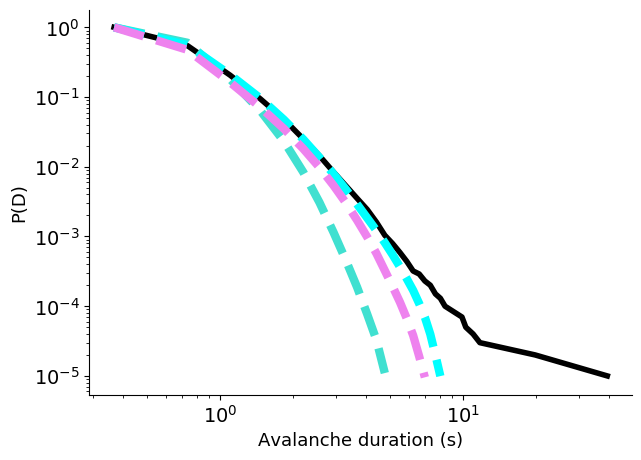

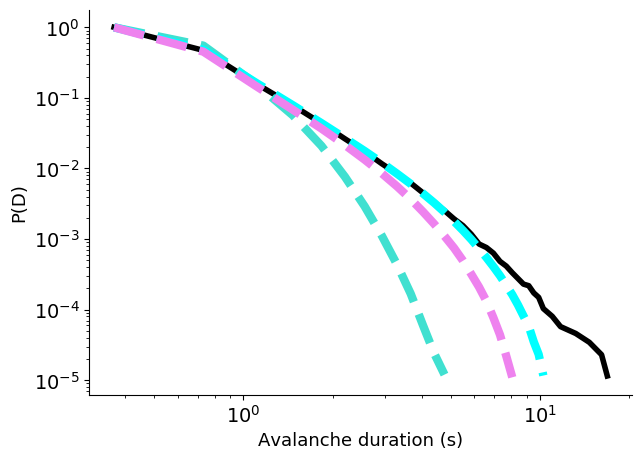

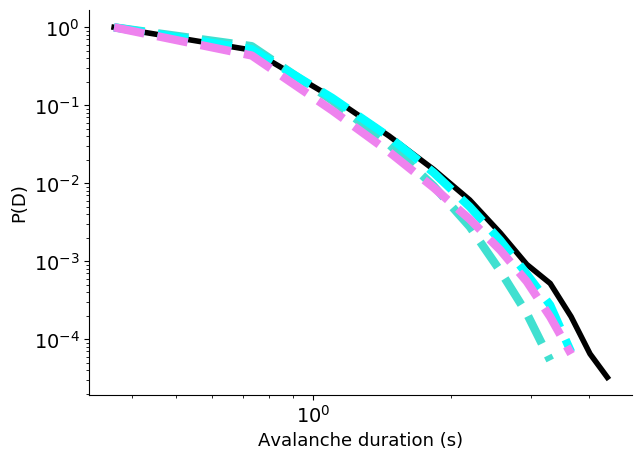

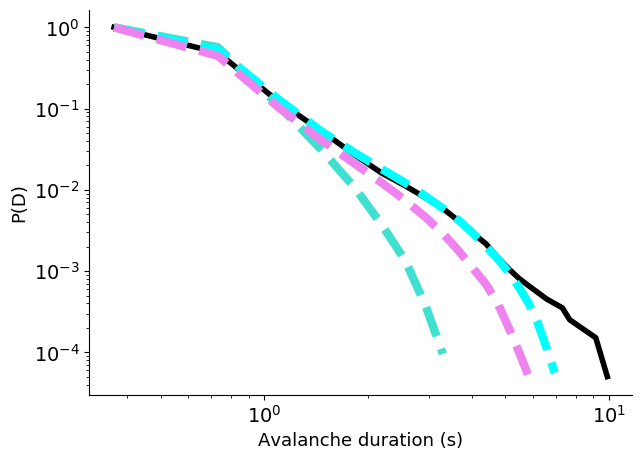

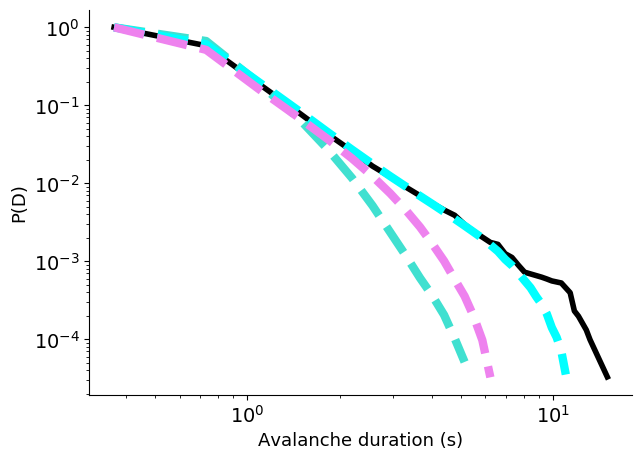

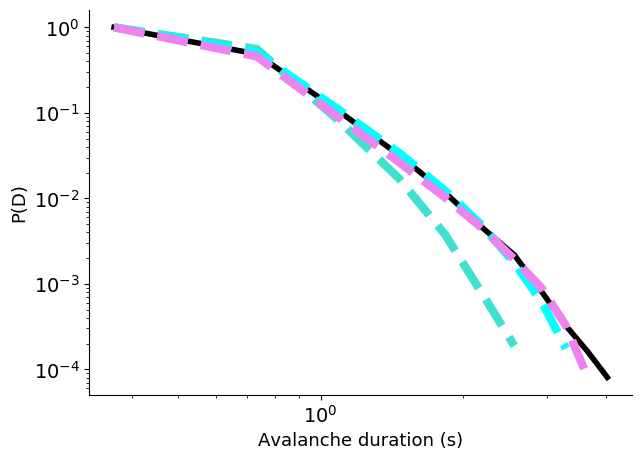

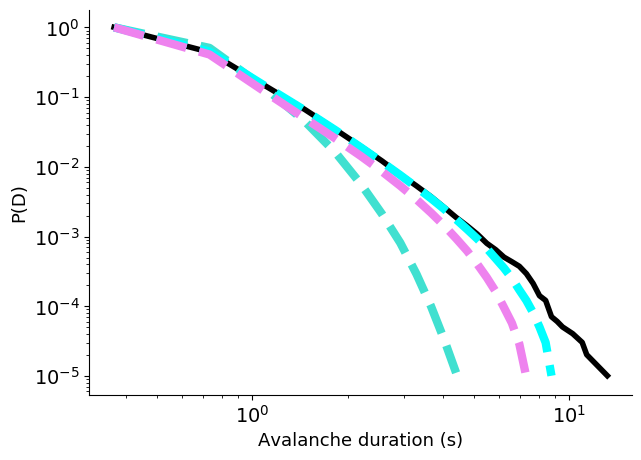

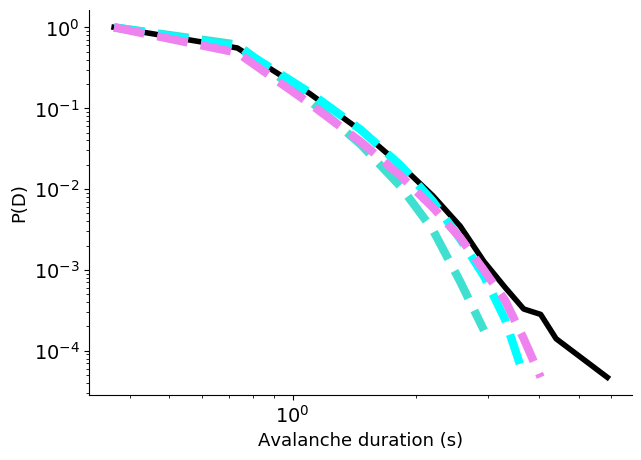

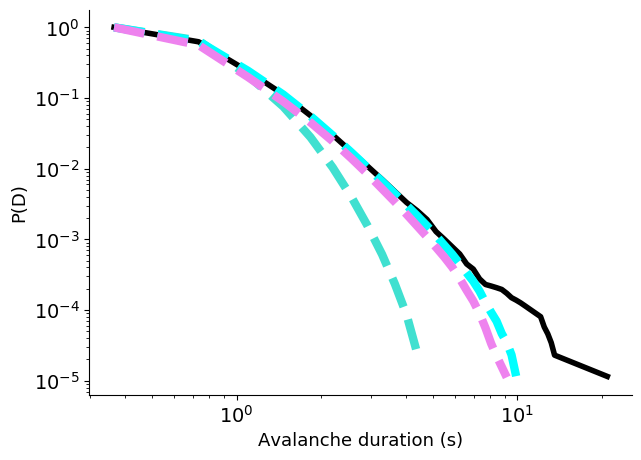

In [371]:
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$','10$^3$']

def getsize(distlist, choose):
    output_list = list(range(len(distlist)))
    for i in range(len(distlist)):
        output_list[i] = (1/2.73)*np.load(distlist[i])[choose]
    return(output_list)

sns.reset_orig()
import matplotlib
import powerlaw
colors = ['black', 'turquoise','cyan', 'violet']

num1 = adfn.name_zero('front',2,12,1)

choose=1
count = 0
for i in num1:
    if i!= '03':
        os.chdir(F10t + 'Project/' + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
        space_list = sorted(glob.glob('*E-' + i + '*BLN*swap*av*'))
        corr_list = sorted(glob.glob('*E-' + i + '*BLN*slide*av*'))
        auto_list = sorted(glob.glob('*E-' + i + '*BLN*auto*av*'))

        fig, axarr = plt.subplots(figsize = (7,5))
        avdistcut = (1/2.73)*np.load(blnlist[0])[choose]
        powerlaw.plot_ccdf(avdistcut,  linewidth = 4, markersize = 1, alpha = 1, c = colors[0])

        nulist = [space_list, corr_list, auto_list]

        for e in range(len(nulist)):
            inp = getsize(nulist[e], choose)
            mean_null = adfn.mean_distribution(inp)
            powerlaw.plot_ccdf(mean_null,  linewidth = 6, markersize = 1, alpha = 1, c = colors[e+1], linestyle = '--')

        axarr.set_xscale('log')
        axarr.set_yscale('log')
        axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #plt.ylim(bottom = 0.00001)  
        #plt.xlim(right = 30)  
        #axarr.set_title(str(blnlist[0]), size = '13')
        axarr.set_ylabel('P(D)', size = '13')
        axarr.set_xlabel('Avalanche duration (s)', size = '13')
        axarr.spines['top'].set_visible(False)
        axarr.spines['right'].set_visible(False)
        axarr.set_xticklabels(labels, fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.savefig(Ffig + 'avdur_null_dist' + str(count) + '.svg', transparent = True)
        count+=1
        plt.show()

In [80]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
size= sorted(glob.glob('*null*size*.npy'))
dur= sorted(glob.glob('*null*dur*.npy'))
size = size[2], size[1], size[0]
dur = dur[2], dur[1], dur[0]
size, dur

(('null_ks-space-size.npy', 'null_ks-corr-size.npy', 'null_ks-auto-size.npy'),
 ('null_ks-space-dur.npy', 'null_ks-corr-dur.npy', 'null_ks-auto-dur.npy'))

In [87]:
curr_list[0]

array([0.03988527, 0.00902367, 0.02118168, 0.00436836, 0.03166386,
       0.02139093, 0.01807108, 0.02147543, 0.01093275, 0.02975961,
       0.02594504])

In [102]:
#SIZE - KS
listlist = size
ks_comb, cols_comb, lab_comb = [],[], []
name_list = 'spatial', 'correlation', 'autocorrelation'

for i in range(len(listlist)):
    curr_list = np.load(listlist[i], allow_pickle=True)
    curr_list1 = np.zeros((2,10))
    curr_list1[0] = np.append(curr_list[0][0],curr_list[0][2:])
    curr_list1[1] = np.append(curr_list[1][0],curr_list[1][2:])
    cols_comb = np.append(cols_comb, np.hstack((adfn.repeat_list('emp', len(curr_list1[0])), adfn.repeat_list(name_list[i], len(curr_list1[1]) ))))
    ks_comb = np.append(ks_comb, np.hstack((curr_list1[0], curr_list1[1])))
    lab_comb = np.append(lab_comb, adfn.repeat_list(name_list[i], (10*2)))

size_df = pd.DataFrame({"ks":ks_comb , "Labels": lab_comb  , "colour":cols_comb})

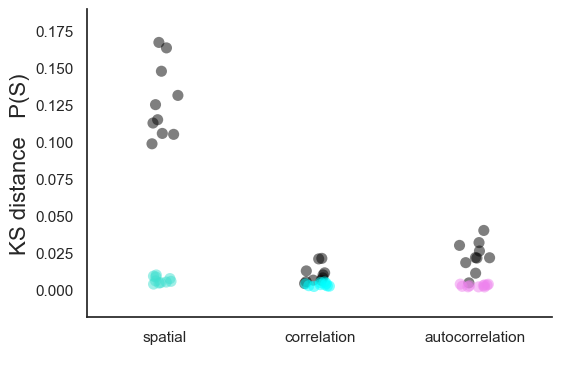

In [103]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors = ['black', 'turquoise','cyan', 'violet']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.stripplot(x="Labels", y="ks", data=size_df, hue = 'colour', palette = colors, size = 8, jitter = True ,alpha = 0.5)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '16')
ax.set_ylabel('KS distance   P(S)', size = '16')
#ax.set_xticklabels(['Baseline', 'inter-ictal', 'ictal'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'null_ks_size.svg', transparent = True)
plt.show()

In [104]:
space = size_df[size_df['Labels'] == 'spatial']
corr = size_df[size_df['Labels'] == 'correlation']
auto = size_df[size_df['Labels'] == 'autocorrelation']

emp_space = space[space['colour'] == 'emp']
null_space = space[space['colour'] == 'spatial']
emp_corr = corr[corr['colour'] == 'emp']
null_corr = corr[corr['colour'] == 'correlation']
emp_auto = auto[auto['colour'] == 'emp']
null_auto = auto[auto['colour'] == 'autocorrelation']
null_list = emp_space, null_space, emp_corr, null_corr, emp_auto, null_auto

In [105]:
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i]['ks'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [106]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp_space['ks'], null_space['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 16.57216583802582   p = 4.733211769276278e-08
Samples are significantly different


In [107]:
#Time
alpha = 0.05/3

t, p = stats.ttest_rel(emp_corr['ks'], null_corr['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 3.856282447731823   p = 0.0038689812430855786
Samples are significantly different


In [108]:
#Phase
alpha = 0.05/3

t, p = stats.ttest_rel(emp_auto['ks'], null_auto['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 6.2852154565092215   p = 0.00014348372280852578
Samples are significantly different


In [109]:
#SIZE - KS
listlist = dur
ks_comb, cols_comb, lab_comb = [],[], []
name_list = 'spatial', 'correlation', 'autocorrelation'

for i in range(len(listlist)):
    curr_list = np.load(listlist[i], allow_pickle=True)
    curr_list1 = np.zeros((2,10))
    curr_list1[0] = np.append(curr_list[0][0],curr_list[0][2:])
    curr_list1[1] = np.append(curr_list[1][0],curr_list[1][2:])
    cols_comb = np.append(cols_comb, np.hstack((adfn.repeat_list('emp', len(curr_list1[0])), adfn.repeat_list(name_list[i], len(curr_list1[1]) ))))
    ks_comb = np.append(ks_comb, np.hstack((curr_list1[0], curr_list1[1])))
    lab_comb = np.append(lab_comb, adfn.repeat_list(name_list[i], (10*2)))

dur_df = pd.DataFrame({"ks":ks_comb , "Labels": lab_comb  , "colour":cols_comb})

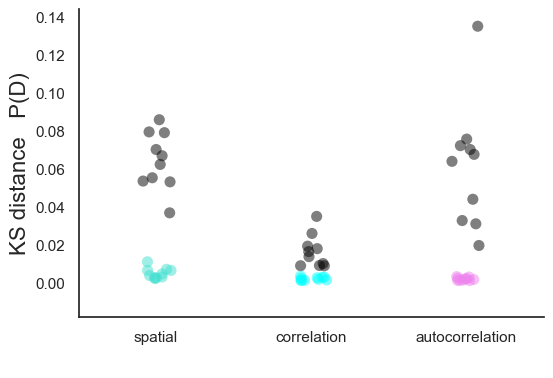

In [110]:

from matplotlib.collections import PathCollection
sns.set(style="white")
colors = ['black', 'turquoise','cyan', 'violet']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.stripplot(x="Labels", y="ks", data=dur_df, hue = 'colour', palette = colors, size = 8, jitter = True ,alpha = 0.5)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance   P(D)', size = '16')
#ax.set_xticklabels(['Baseline', 'inter-ictal', 'ictal'], size = 15)
ax.legend_.remove()
#plt.savefig(Ffig + 'null_ks_dur.svg', transparent = True)
plt.show()


In [111]:
space = dur_df[dur_df['Labels'] == 'spatial']
corr = dur_df[dur_df['Labels'] == 'correlation']
auto = dur_df[dur_df['Labels'] == 'autocorrelation']

emp_space = space[space['colour'] == 'emp']
null_space = space[space['colour'] == 'spatial']
emp_corr = corr[corr['colour'] == 'emp']
null_corr = corr[corr['colour'] == 'correlation']
emp_auto = auto[auto['colour'] == 'emp']
null_auto = auto[auto['colour'] == 'autocorrelation']
null_list = emp_space, null_space, emp_corr, null_corr, emp_auto, null_auto

In [112]:
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i]['ks'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [113]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp_space['ks'], null_space['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 13.025620067556138   p = 3.817887762988487e-07
Samples are significantly different


In [114]:
#Time
alpha = 0.05/3

t, p = stats.ttest_rel(emp_corr['ks'], null_corr['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 5.742469807355878   p = 0.00027893090473908144
Samples are significantly different


In [115]:
#Phase
alpha = 0.05/3

t, p = stats.ttest_rel(emp_auto['ks'], null_auto['ks'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 5.704394021729182   p = 0.0002926755530837891
Samples are significantly different


In [47]:
num1 = adfn.name_zero('front',2,12,1)
for choose in range(2):
    av_name = 'size', 'dur'
    for null_choose in range(3):
        null_name = ['space', 'time', 'phase']
        space_list, time_list, slide_list = [],[],[]


        null_ks = np.zeros(len(num1))
        bln_ks = np.zeros(len(num1))
        count = 0

        ks_out = list(range(2))

        def getav(distlist, choose):
            output_list = list(range(len(distlist)))
            for i in range(len(distlist)):
                output_list[i] = np.load(distlist[i])[choose]
            return(output_list)

        for x,i in enumerate(num1):
            os.chdir(Fdrop + 'Project/' + experiment)
            blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
            if null_name[null_choose] == 'space':
                space_list = sorted(glob.glob('*E-' + i + '*BLN*swapredo*av*'))
            if null_name[null_choose] == 'time':
                time_list = sorted(glob.glob('*E-' + i + '*BLN*autoredo*av*'))
            if null_name[null_choose] == 'phase':
                slide_list = sorted(glob.glob('*E-' + i + '*BLN*slideredo*av*'))

            null_list = space_list, time_list, slide_list 
            curr_bln = np.load(blnlist[0])[choose]
            av_list = getav(null_list[null_choose], choose)
            curr_mean = adfn.mean_distribution(av_list)
            bln_ks[x] = stats.ks_2samp(curr_mean, curr_bln)[0]
            fill = []
            for e in range(len(av_list)):
                fill = np.append(fill,  stats.ks_2samp(curr_mean, av_list[e])[0])
            null_ks[x] = np.mean(fill)
            
        ks_out = [bln_ks, null_ks]
        np.save(savepath + 'null_ks-' + null_name[null_choose] + '-' + av_name[choose] + '.npy', ks_out)
        print('Done ' + null_name[null_choose] + av_name[choose])

Done spacesize
Done timesize
Done phasesize
Done spacedur
Done timedur
Done phasedur


In [205]:
num1 = adfn.name_zero('front',2,12,1)
LLR_space = np.zeros((len(num1), 2))
LLR_time = np.zeros((len(num1), 2))
LLR_phase = np.zeros((len(num1), 2))


for choose in range(2):
    av_name = 'size', 'dur'
    for null_choose in range(3):
        null_name = ['space', 'time', 'phase']
        space_list, time_list, slide_list = [],[],[]


        def getav(distlist, choose):
            output_list = list(range(len(distlist)))
            for i in range(len(distlist)):
                output_list[i] = np.load(distlist[i])[choose]
            return(output_list)

        for x,i in enumerate(num1):
            os.chdir(Fdrop + 'Project/' + experiment)
            blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
            if null_name[null_choose] == 'space':
                space_list = sorted(glob.glob('*E-' + i + '*BLN*swap*'))
            if null_name[null_choose] == 'time':
                time_list = sorted(glob.glob('*E-' + i + '*BLN*auto*'))
            if null_name[null_choose] == 'phase':
                slide_list = sorted(glob.glob('*E-' + i + '*BLN*slide*'))

            null_list = space_list, time_list, slide_list 
            av_list = getav(null_list[null_choose], choose)
            curr_mean = adfn.mean_distribution(av_list)
            

            if choose == 0:  
                data = curr_mean
                npart = 2000
                sizes=data
                M=len(sizes)
                a=min(sizes) #define xmin
                b=max(sizes) #define xmax
                size_ln=isfn.IS_LN(npart, sizes, M, a, b)
                size_po=isfn.IS(npart, sizes, M, a, b)
                llr = size_po[1] - size_ln[2]
                
            elif choose == 1:
                data = curr_mean
                npart = 2000
                sizes=data
                a=2 #define xmin
                b=max(sizes) #define xmax
                M=len(sizes[np.where(sizes>a-1)])
                dur_ln=isfn.IS_LN(npart, sizes, M, a, b)
                dur_po=isfn.IS(npart, sizes, M, a, b)
                llr = dur_po[1] - dur_ln[2]
            
            if null_choose == 0:
                LLR_space[x, choose] = llr
                
            elif null_choose == 1:
                LLR_time[x, choose] = llr

            elif null_choose == 2:
                LLR_phase[x, choose] = llr


                
        #np.save(savepath + 'null_ks-' + null_name[null_choose] + '-' + av_name[choose] + '.npy', ks_out)
        print('Done ' + null_name[null_choose] + av_name[choose])

Done spacesize
Done timesize
Done phasesize
Done spacedur
Done timedur
Done phasedur


In [ ]:
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
savepath = Fdrop + 'Project/' + experiment + os.sep 
av_list = sorted(glob.glob('*redo*av*'))[440:880]
pkg_list = sorted(glob.glob('*redo*pkg*'))[440:880]

In [ ]:
for i in range(len(pkg_list)):
    br = crfn.branch(np.load(pkg_list[i]), np.load(av_list[i]))
    name = pkg_list[i][:pkg_list[i].find('pkg')] 
    np.save(savepath + name + '-branch.npy', br)
    print('Done ' + str(i))

In [371]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
bln_blist = sorted(glob.glob('*BLN*_branch*'))
space_blist = sorted(glob.glob('*swap*redo*branch*'))
time_blist = sorted(glob.glob('*auto*redo*branch*'))
phase_blist = sorted(glob.glob('*slide*redo*branch*'))

In [ ]:
num1 = adfn.name_zero('front',2,12,1)
for null_choose in range(3):
    null_name = ['space', 'time', 'phase']
    space_list, time_list, slide_list = [],[],[]

    bln_branch = np.zeros(len(num1))
    null_branch = np.zeros(len(num1))
    count = 0
    br_out = list(range(2))
    for x,i in enumerate(num1):
        os.chdir(Fdrop + 'Project/' + experiment)
        bln_list = sorted(glob.glob('*E-' + i + '*BLN*_branch.npy*'))
        if null_name[null_choose] == 'space':
            space_list = sorted(glob.glob('*E-' + i + '*BLN*swapredo*branch*'))
        if null_name[null_choose] == 'time':
            time_list = sorted(glob.glob('*E-' + i + '*BLN*autoredo*branch*'))
        if null_name[null_choose] == 'phase':
            slide_list = sorted(glob.glob('*E-' + i + '*BLN*slideredo*branch*'))

        null_list = space_list, time_list, slide_list 
        br_list = null_list[null_choose]
        bln_branch[x] = np.load(bln_list[0])

        fill = []
        for e in range(len(br_list)):
            fill = np.append(fill,  np.load(br_list[e]))
        null_branch[x] = np.mean(fill)

    br_out = [bln_branch, null_branch]
    np.save(savepath + 'null_branch-' + null_name[null_choose]  + '.npy', br_out)
    print('Done ' + null_name[null_choose])

In [137]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
null_blist = sorted(glob.glob('*null*branch*'))
null_blist = null_blist[2], null_blist[1], null_blist[0]
null_blist

('null_branch-space.npy', 'null_branch-corr.npy', 'null_branch-auto.npy')

In [134]:
len(br_comb)

41

In [129]:
curr_list

array([1.0188171 , 1.15896876, 1.03879917, 1.04537797, 0.80639755,
       0.87430893, 0.91255555, 0.78822941, 1.0196698 , 0.85343054,
       0.96850711])

In [130]:
curr_list1

array([1.0188171 , 1.03879917, 1.04537797, 0.80639755, 0.87430893,
       0.91255555, 0.78822941, 1.0196698 , 0.85343054, 0.96850711])

In [140]:
import pandas as pd

listlist = null_blist
br_comb, lab_comb = [],[]

cols_comb = np.append(adfn.repeat_list('empirical', 11), np.append(adfn.repeat_list('spatial', 11), np.append(adfn.repeat_list('corr.', 11), adfn.repeat_list('autocorr.', 11))))
br_comb = np.load(listlist[0])[0]
for i in range(len(listlist)):
    curr_list = np.load(listlist[i])[1]
    for e in range(len(curr_list)):
        br_comb = np.append(br_comb, curr_list[e])

br_df = pd.DataFrame({"BR":br_comb , "Labels": cols_comb})



In [152]:
br_comb

array([0.98666691, 1.08903331, 1.0201792 , 1.03304885, 0.83854234,
       0.88346815, 0.90697536, 0.7978313 , 1.01779413, 0.8623049 ,
       0.9635127 ])

In [157]:
br_comb = np.load(listlist[0])[0]
br_comb1 = np.append(br_comb[0],br_comb[2:])
br_comb1

array([0.98666691, 1.0201792 , 1.03304885, 0.83854234, 0.88346815,
       0.90697536, 0.7978313 , 1.01779413, 0.8623049 , 0.9635127 ])

In [148]:
curr_list

array([1.0188171 , 1.15896876, 1.03879917, 1.04537797, 0.80639755,
       0.87430893, 0.91255555, 0.78822941, 1.0196698 , 0.85343054,
       0.96850711])

In [149]:
curr_list1

array([1.0188171 , 1.03879917, 1.04537797, 0.80639755, 0.87430893,
       0.91255555, 0.78822941, 1.0196698 , 0.85343054, 0.96850711])

In [158]:
import pandas as pd

listlist = null_blist
br_comb, lab_comb = [],[]

cols_comb = np.append(adfn.repeat_list('empirical', 10), np.append(adfn.repeat_list('spatial', 10), np.append(adfn.repeat_list('corr.', 10), adfn.repeat_list('autocorr.', 10))))
br_comb = np.load(listlist[0])[0]
br_comb1 = np.append(br_comb[0],br_comb[2:])
for i in range(len(listlist)):
    curr_list = np.load(listlist[i])[1]
    curr_list1 = np.zeros((10))
    curr_list1 = np.append(curr_list[0],curr_list[2:])
    for e in range(len(curr_list1)):
        br_comb1 = np.append(br_comb1, curr_list1[e])

br_df = pd.DataFrame({"BR":br_comb1 , "Labels": cols_comb})

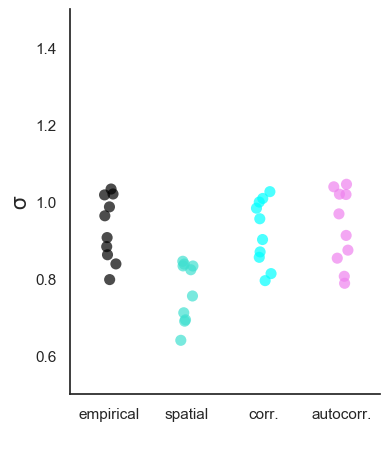

In [159]:
import matplotlib 
import seaborn as sns
colors = ['black', 'turquoise','cyan', 'violet']
sns.set(style="white")
fig, ax = plt.subplots(figsize = (4,5))

ax = sns.stripplot(x="Labels", y="BR", data=br_df, palette = colors, jitter = True, size = 8, alpha = 0.7)
#plt.hlines(np.mean(branchdf['branch ratio']), -0.02 ,0.02, linestyle = '-', color = 'k', lw=4.5)
#plt.hlines(1, -0.15 ,0.15, linestyle = '--', color = 'grey')
ax.set_ylabel('σ', size = '16')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
plt.ylim(0.5,1.5)
#plt.savefig(Ffig + 'null_BR.svg', transparent = True)
plt.show()

In [160]:
emp = br_df[br_df['Labels'] == 'empirical']
space = br_df[br_df['Labels'] == 'spatial']
corr = br_df[br_df['Labels'] == 'corr.']
auto = br_df[br_df['Labels'] == 'autocorr.']
null_list = emp['BR'], space['BR'], corr['BR'], auto['BR']


In [161]:
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [162]:
from scipy import stats
data = emp['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9310323831499296 0.026644529874785532


In [163]:
from scipy import stats
data = space['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.7663531746607617 0.024458319346485624


In [164]:
from scipy import stats
data = corr['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9208932311788915 0.02680490688403883


In [165]:
from scipy import stats
data = auto['BR']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9326093127918627 0.031115974858644296


In [166]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['BR'], space['BR'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 21.849427384688596   p = 4.1564617850164745e-09
Samples are significantly different


In [167]:
#Time
alpha = 0.05/3

t, p = stats.ttest_rel(emp['BR'], corr['BR'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 4.452870646815863   p = 0.0015935747121959402
Samples are significantly different


In [168]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['BR'], auto['BR'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -0.2799720500965227   p = 0.7858273294285794
Samples are the same


In [ ]:
for i in range(len(av_list)):
    curr_av = np.load(av_list)
    dcc = crfn.DCC(curr_av)

In [393]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
bln_dcc = sorted(glob.glob('*BLN*DCC.npy*')) 
foc_dcc = sorted(glob.glob('*_PTZ05*DCC.npy*')) 
gen_dcc = sorted(glob.glob('*_PTZ20*DCC.npy*')) 
space_dcc = sorted(glob.glob('*DCC*swap*')) 
corr_dcc = sorted(glob.glob('*DCC*slide*')) 
auto_dcc = sorted(glob.glob('*DCC*auto*')) 
space_dcc, corr_dcc, auto_dcc

(['null_DCC-swap.npy'], ['null_DCC-slide.npy'], ['null_DCC-auto.npy'])

In [ ]:
num1 = adfn.name_zero('front', 2, 12, 1)

for null_choose in range(3):
    null_name = ['space', 'time', 'phase']
    save_name = ['swap', 'auto', 'slide']
    space_list, time_list, slide_list = [],[],[]
    dcc_vec = np.zeros(len(num1))


    def getav(distlist):
        output_list = list(range(len(distlist)))
        for i in range(len(distlist)):
            output_list[i] = np.load(distlist[i])
        return(output_list)

    for x,i in enumerate(num1):
        os.chdir(Fdrop + 'Project/' + experiment)
        if null_name[null_choose] == 'space':
            space_list = sorted(glob.glob('*E-' + i + '*BLN*swapredo*av*'))
        if null_name[null_choose] == 'time':
            time_list = sorted(glob.glob('*E-' + i + '*BLN*autoredo*av*'))
        if null_name[null_choose] == 'phase':
            slide_list = sorted(glob.glob('*E-' + i + '*BLN*slideredo*av*'))

        null_list = space_list, time_list, slide_list 
        av_list = getav(null_list[null_choose])
        fill = []
        for r in range(len(av_list)):
            fill = np.append(fill, crfn.DCC(av_list[r]))
        dcc_vec[x] = np.mean(fill)
    name = adfn.name_template([null_list[null_choose][0]], 'short') 
    np.save(savepath + 'null_DCC-' + save_name[null_choose] + '.npy', dcc_vec)
    print('Done ' + str(null_choose))

In [395]:
dcc = np.zeros((10))
lab =list(range(10))

dcc_list = [bln_dcc]
count=0
for i in range(len(dcc_list)):
    for y in range(10):
        dcc[count] = np.load(dcc_list[i][y] ,allow_pickle=True)
        lab[count] = 'empirical'
        count+=1

In [396]:
dcc_list

[['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09-DCC.npy']]

In [416]:
len(dcc)

10

In [417]:
dcc = np.zeros((10))
lab =list(range(10))

dcc_list = [bln_dcc]
count=0
for i in range(len(dcc_list)):
    for y in range(10):
        dcc[count] = np.load(dcc_list[i][y] ,allow_pickle=True)
        lab[count] = 'empirical'
        count+=1


listlist = space_dcc, corr_dcc, auto_dcc
name_list = 'spatial', 'corr.', 'autocorr.'

dcc_comb = dcc
lab_comb = lab

for i in range(len(listlist)):
    for e in range(len(listlist[i])):
        for x in range(len(np.load(listlist[i][e]))):
            if x!= 1:
                dcc_comb = np.append(dcc_comb, np.load(listlist[i][e])[x])
                lab_comb = np.append(lab_comb,name_list[i])
                              

null_df = pd.DataFrame({"dcc":dcc_comb , "Labels": lab_comb})

In [434]:
null_df

dcc     Labels
0   0.207472  empirical
1   0.201852  empirical
2   0.091520  empirical
3   0.142556  empirical
4   0.001309  empirical
5   0.113562  empirical
6   0.353099  empirical
7   0.016977  empirical
8   0.190581  empirical
9   0.003675  empirical
10  0.216358    spatial
11  0.293787    spatial
12  0.308054    spatial
13  0.350185    spatial
14  0.319659    spatial
15  0.205761    spatial
16  0.432004    spatial
17  0.379093    spatial
18  0.306779    spatial
19  0.272461    spatial
20  0.152401      corr.
21  0.055141      corr.
22  0.032540      corr.
23  0.305824      corr.
24  0.021540      corr.
25  0.144261      corr.
26  0.305780      corr.
27  0.091168      corr.
28  0.343165      corr.
29  0.019717      corr.
30  0.072144  autocorr.
31  0.248582  autocorr.
32  0.146347  autocorr.
33  0.486806  autocorr.
34  0.042572  autocorr.
35  0.044348  autocorr.
36  0.343874  autocorr.
37  0.208760  autocorr.
38  0.431190  autocorr.
39  0.031587  autocorr.

In [ ]:
null_list = np.load(swap_br[0])[1]
name_list = 'spatial'

br_comb = []
lab_comb = []
plot_comb, col_comb = [],[]

br_list = [bln_br]

for i in range(len(br_list)):
    for y in range(10):
        br_comb = np.append(br_comb, np.load(br_list[i][y] ,allow_pickle=True))
        lab_comb = np.append(lab_comb,'empirical')
        plot_comb = np.append(plot_comb, 1)
        col_comb = np.append(col_comb, y+1)

count=1
for i in range(len(null_list)):
    br_comb = np.append(br_comb, null_list[i])
    lab_comb = np.append(lab_comb,name_list)
    plot_comb = np.append(plot_comb, 1)
    col_comb = np.append(col_comb, 0)

    

null_df = pd.DataFrame({"br":br_comb , "Labels": lab_comb, 'Plot': plot_comb.astype(int), 'Col': col_comb.astype(int)})
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
col_list = list(range(len(colors ) + 1))
for i in range(len(colors)+1):
    if i == 0:
        col_list[i] = 'lightgrey'
    else:
        col_list[i] = colors[i-1]

In [435]:
null_df = pd.DataFrame({"br":br_comb , "Labels": lab_comb, 'Plot': plot_comb.astype(int), 'Col': col_comb.astype(int)})

colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
col_list = list(range(len(colors ) + 1))
for i in range(len(colors)+1):
    if i == 0:
        col_list[i] = 'lightgrey'
    else:
        col_list[i] = colors[i-1]

In [441]:
col_list

['lightgrey',
 array([0.36862745, 0.30980392, 0.63529412, 1.        ]),
 array([0.21607074, 0.55563245, 0.73194925, 1.        ]),
 array([0.45305652, 0.78154556, 0.64628989, 1.        ]),
 array([0.74771242, 0.89803922, 0.62745098, 1.        ]),
 array([0.94425221, 0.97770088, 0.66205306, 1.        ]),
 array([0.99777009, 0.93087274, 0.63306421, 1.        ]),
 array([0.99346405, 0.74771242, 0.43529412, 1.        ]),
 array([0.96378316, 0.47743176, 0.28581315, 1.        ]),
 array([0.84721261, 0.26120723, 0.30519031, 1.        ]),
 array([0.61960784, 0.00392157, 0.25882353, 1.        ])]

In [ ]:
size_list = []
for i in range(len(null_df['br'])):
    if i < 11:
        size_list = np.append(size_list, 8)
    else:
        size_list = np.append(size_list, 11)

import matplotlib 
import seaborn as sns
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))

sns.set(style="white")
fig, ax = plt.subplots(figsize = (2.5,6))
ax = sns.stripplot(x="Labels", y="br", data=null_df, hue =palette = col_list, size = 14 , jitter = True)
#plt.hlines(np.mean(null_df['dcc'][null_df['Labels'] == 'empirical']), -0.2 ,0.2, linestyle = '-', color = 'black', linewidth = 4, zorder = 10)
plt.hlines(1, -0.35 ,1.35, linestyle = '--', color = 'grey', linewidth = 2, zorder = 1)
#plt.hlines(np.mean(np.load(swap_dcc[0])), 0.8 ,1.2, linestyle = '-', color = 'grey', linewidth = 4, zorder = 10)

ax.set_ylabel('σ', size = '17')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
plt.ylim(bottom = 0.3, top = 1.7)  
ax.legend_.remove()
plt.savefig(Ffig + 'BR_baseline.svg', transparent = True)
plt.show()

In [440]:
import matplotlib 
import seaborn as sns
colors = ['black', 'turquoise','cyan', 'violet']
sns.set(style="white")
fig, ax = plt.subplots(figsize = (4,5))

ax = sns.stripplot(x="Labels", y="dcc", data=null_df, hue = 'Col', palette = col_list, jitter = True, size = 14, alpha = 1)
plt.hlines(0.2, -0.5 ,3.5, color = 'grey',  linestyle = '--', linewidth = 2, zorder = 1)
ax.set_ylabel('DCC', size = '16')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
plt.ylim(-0.05,0.5)
#plt.savefig(Ffig + 'null_DCC.svg', transparent = True)
plt.show()

ValueError: Could not interpret input 'Col'

In [419]:
emp = null_df[null_df['Labels'] == 'empirical']
space = null_df[null_df['Labels'] == 'spatial']
corr = null_df[null_df['Labels'] == 'corr.']
auto = null_df[null_df['Labels'] == 'autocorr.']
null_list = emp['dcc'], space['dcc'], corr['dcc'], auto['dcc']

In [420]:
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [421]:
from scipy import stats
data = emp['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.13226028743987198 0.03523868402311583


In [404]:
from scipy import stats
data = space['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.3084142399664453 0.021772153638037996


In [190]:
from scipy import stats
data = corr['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.1471536946738002 0.04021486960927059


In [191]:
from scipy import stats
data = auto['dcc']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.20562093613067822 0.05324232702555519


In [407]:
len(emp['dcc'])

9

In [422]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['dcc'], space['dcc'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -4.800720035134744   p = 0.0009727432570091757
Samples are significantly different


In [423]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['dcc'], corr['dcc'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -0.4843170823005113   p = 0.6397288009033959
Samples are the same


In [194]:
#Space
alpha = 0.05/3

t, p = stats.ttest_rel(emp['dcc'], auto['dcc'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -1.595701560364621   p = 0.14501983179493855
Samples are the same


# Manifold smoothness

In [8]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
p5pcv = sorted(glob.glob('*PTZ05*pcavar.npy'))
p20pcv = sorted(glob.glob('*PTZ20*pcavar.npy'))
blnraw

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy']

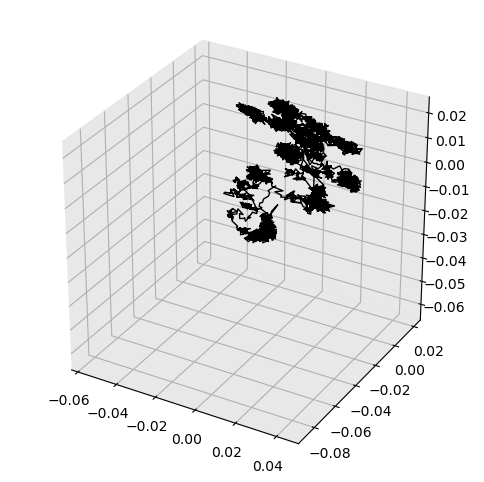

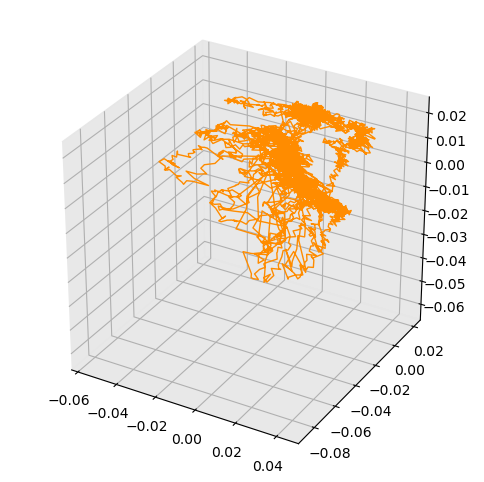

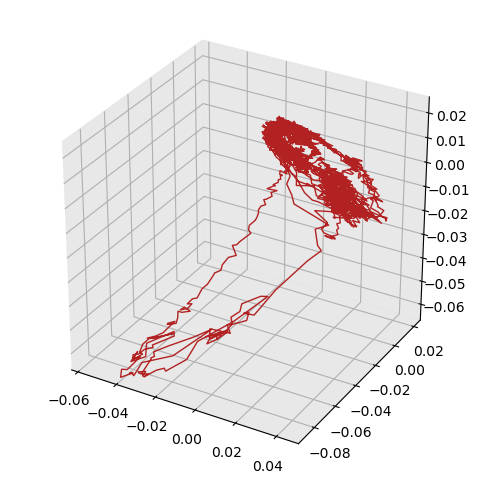

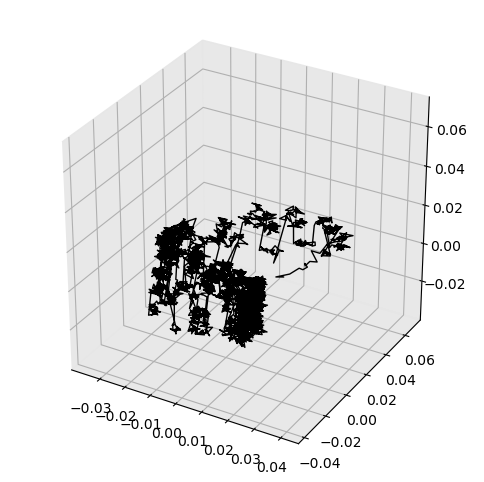

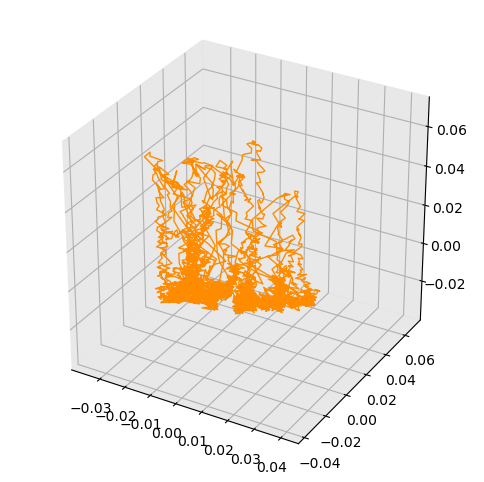

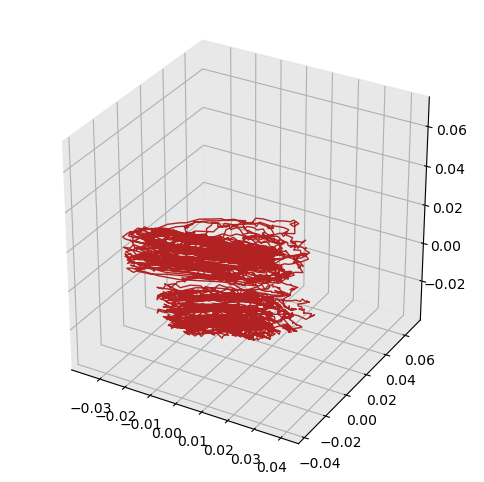

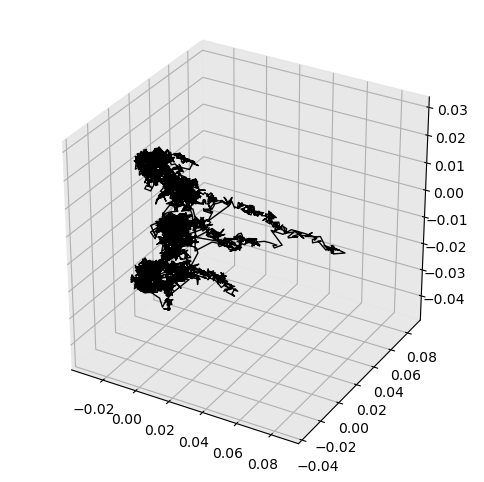

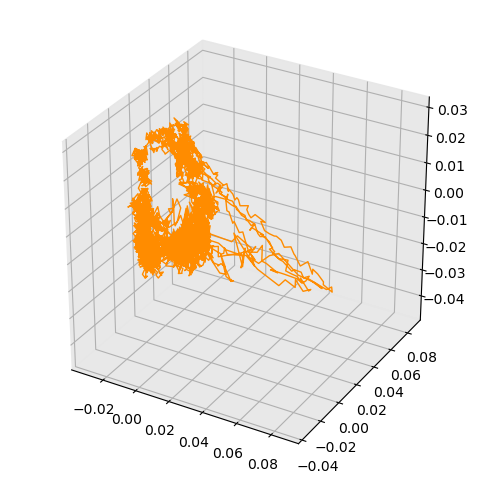

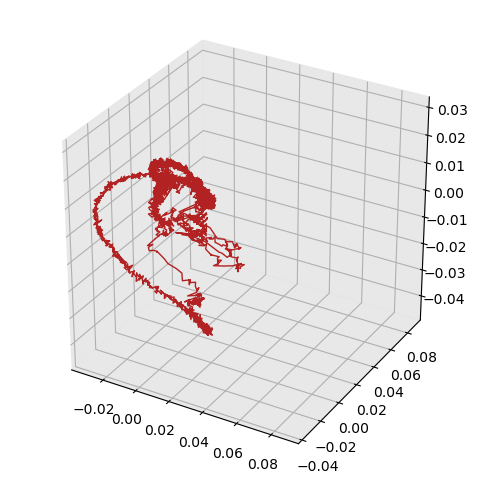

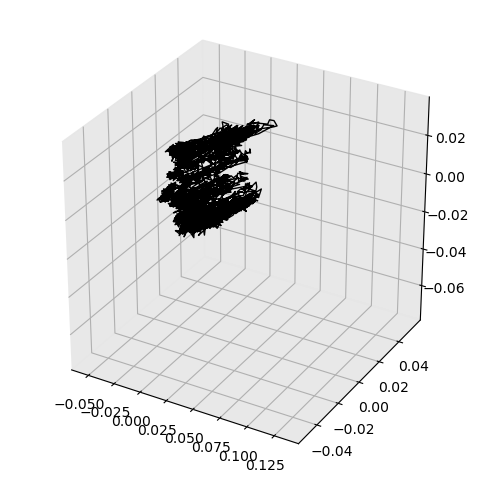

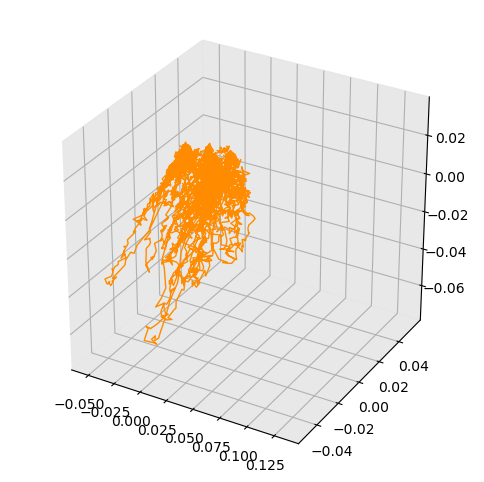

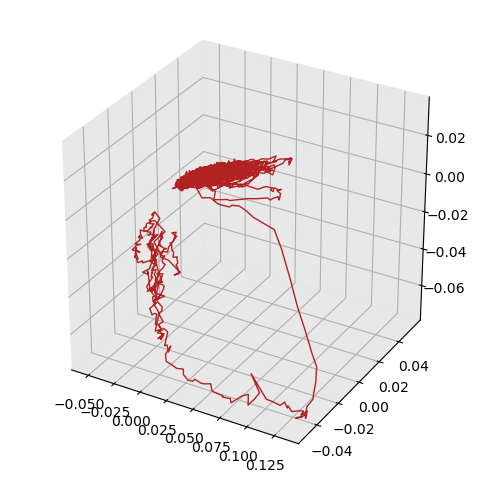

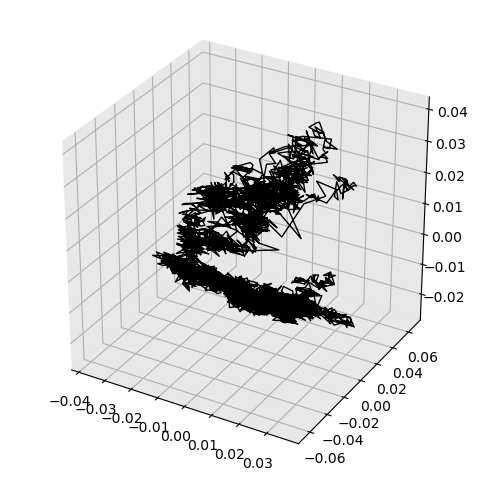

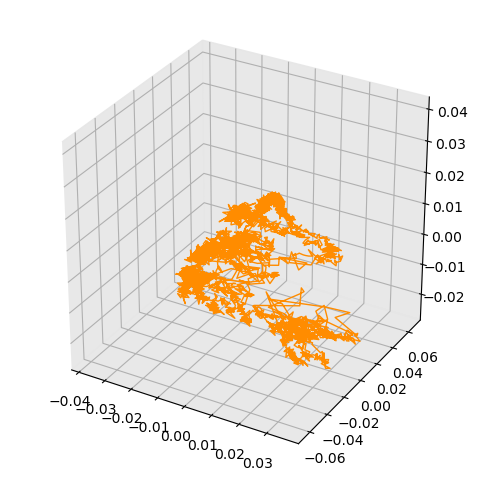

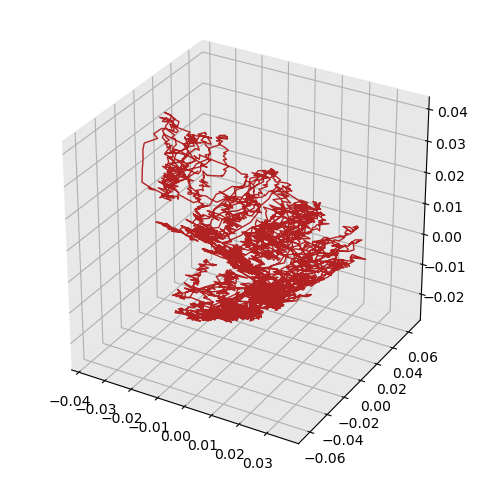

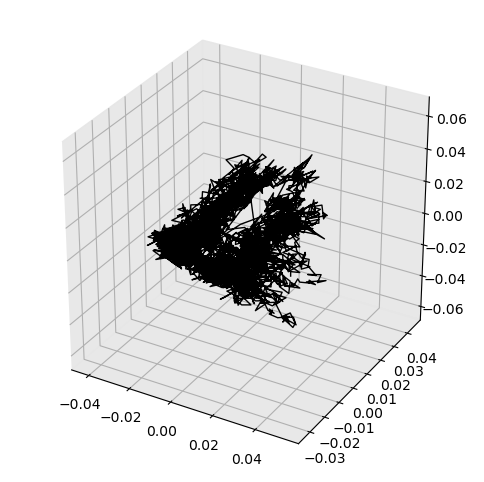

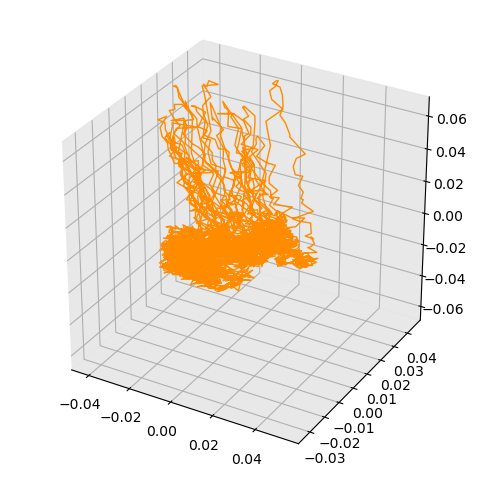

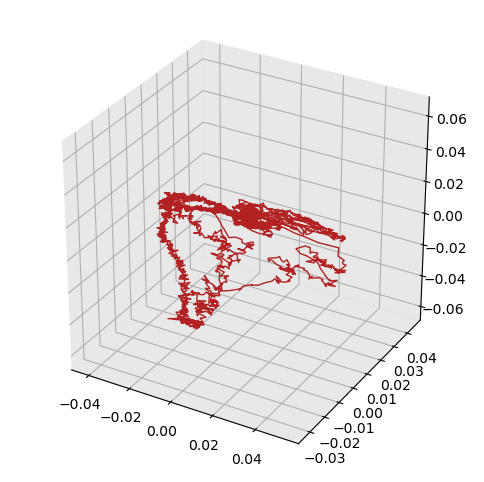

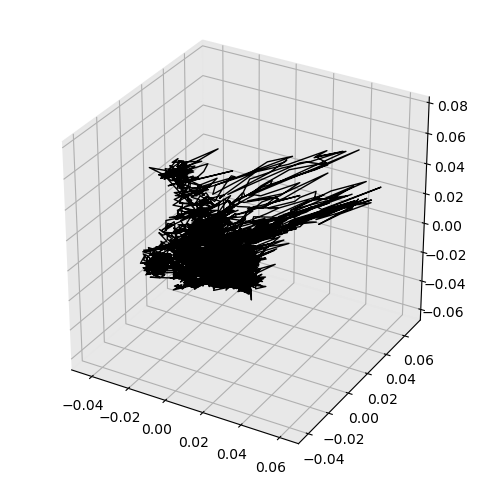

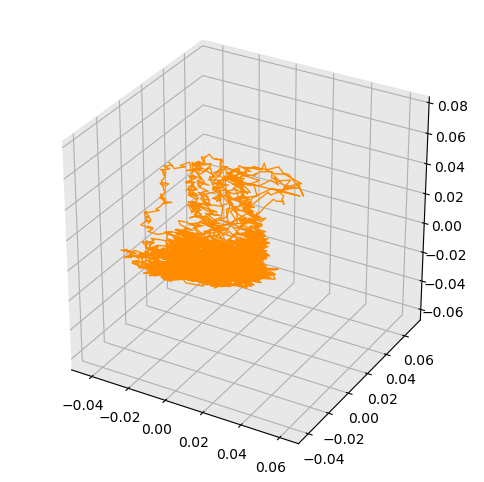

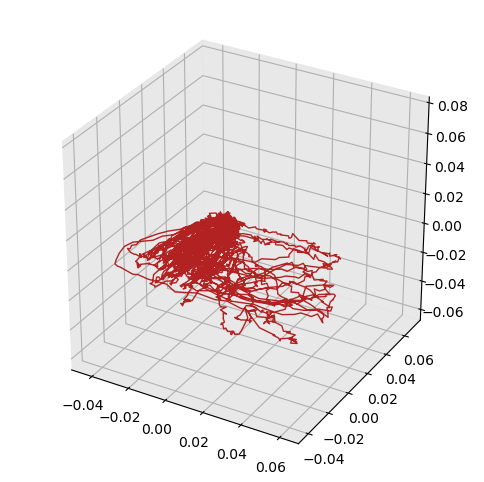

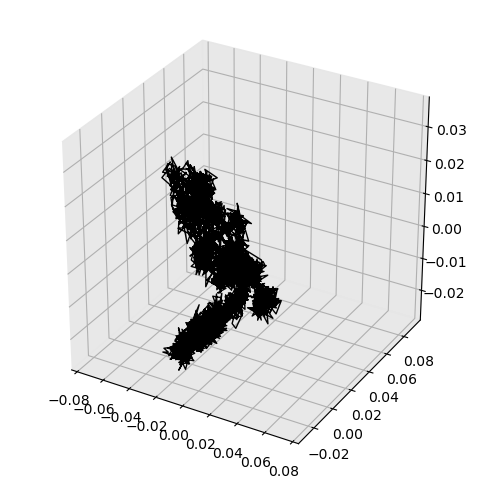

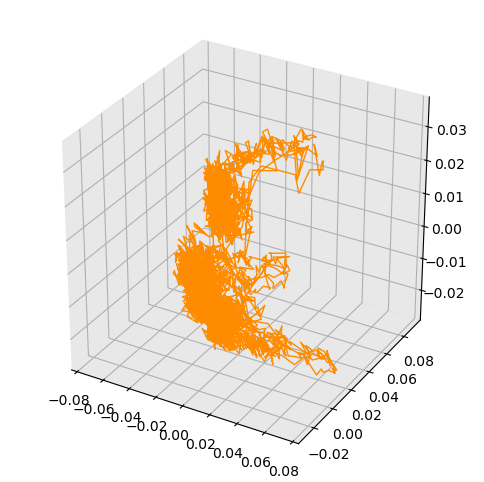

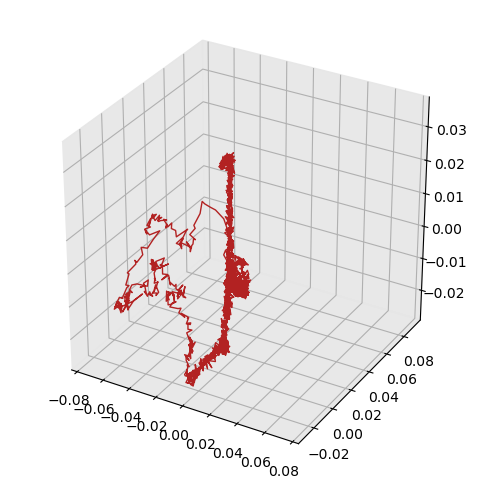

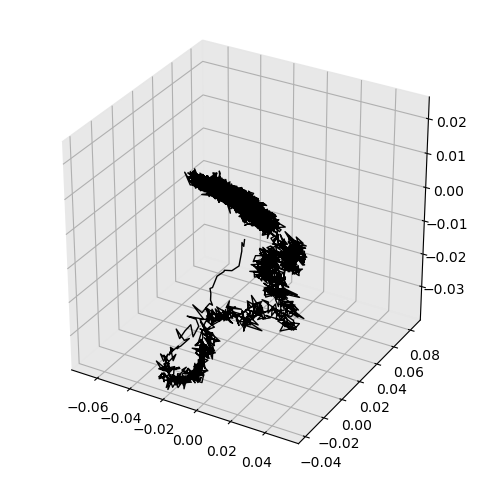

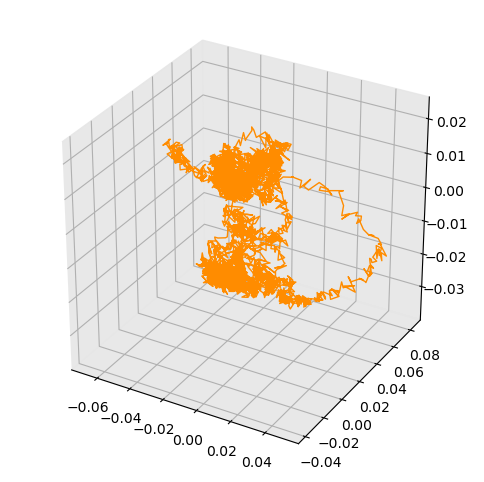

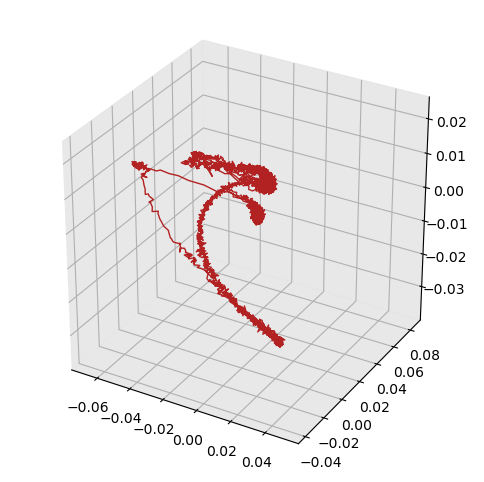

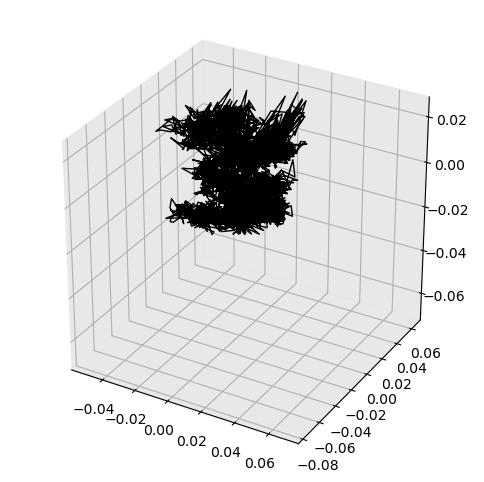

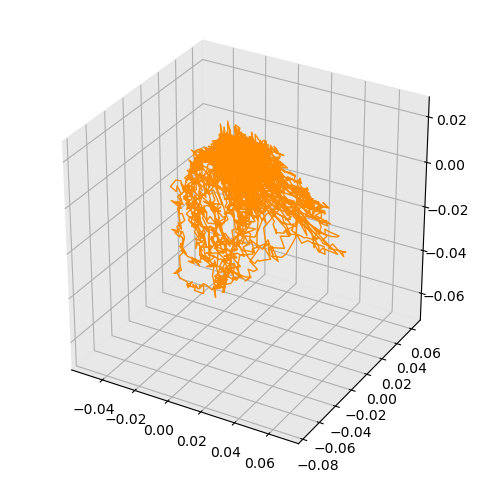

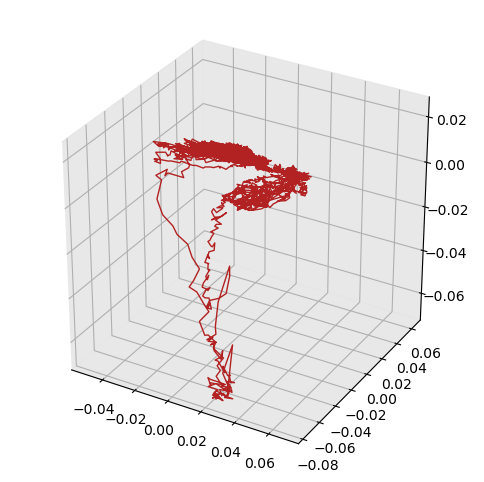

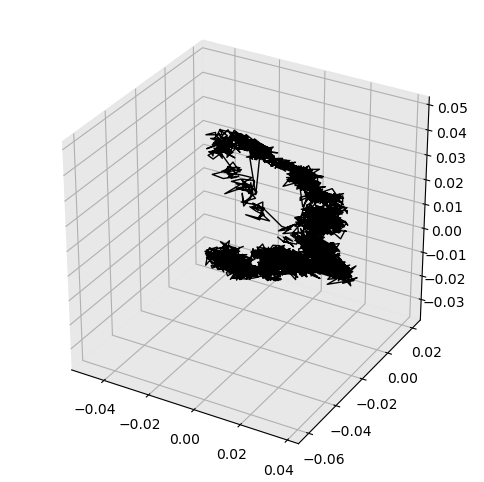

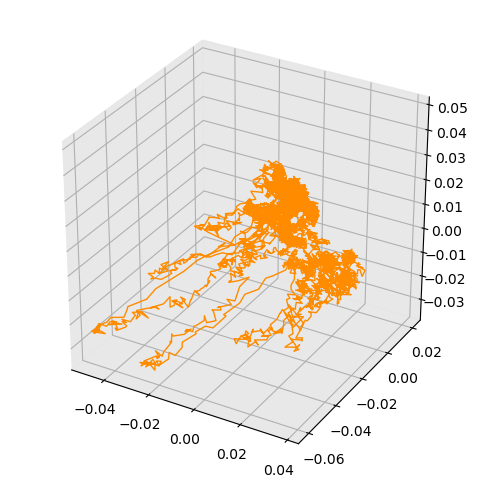

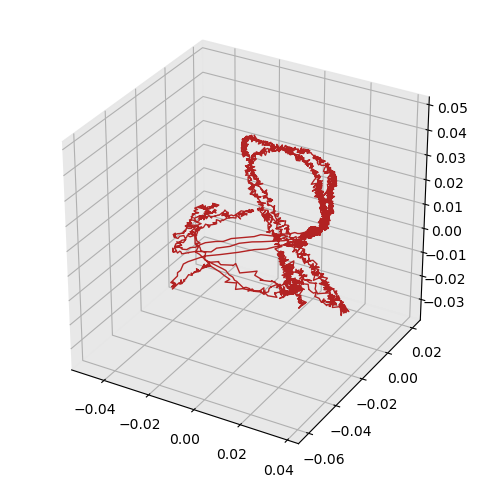

In [35]:
import matplotlib
import powerlaw
from sklearn import decomposition

sns.reset_orig()
num1 = adfn.name_zero('front',2,12,1)
labels = ['10$^0$','10$^1$','10$^0$','10$^1$','10$^2$','10$^3$']


blnslope, p5slope, p20slope = list(range(11)), list(range(11)), list(range(11))
blncorr, precorr, p20corr = list(range(11)), list(range(11)), list(range(11))

count=0
for f,i in enumerate(num1):
    colors = ['k','darkorange','firebrick']


    bln = np.load(blnraw[f])
    p5 = np.load(p5raw[f])
    p20 = np.load(p20raw[f])
    plotlist = bln, p5, p20
    x,y,z, = [],[],[]

    for i in range(len(plotlist)):
        pca = decomposition.PCA(n_components)
        fit = pca.fit(plotlist[i]) 
        x = np.append(fit.components_[3,:], x)
        y = np.append(fit.components_[2,:], y)
        z = np.append(fit.components_[1,:], z)
    xmax, xmin = np.max(x), np.min(x)
    ymax, ymin = np.max(y), np.min(y)
    zmax, zmin = np.max(z), np.min(z)

    namelist = ['bln', 'focal', 'gen']
    for i in range(len(plotlist)):
        pca = decomposition.PCA(n_components)
        fit = pca.fit(plotlist[i])
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize= (6,6))
        ax = fig.add_subplot(projection='3d')
        ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], colors[i], linewidth = 1)
        ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
        ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
        ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
        ax.set_zlim(zmin, zmax)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)

        plt.savefig(Ffig + 'manifold_' + namelist[i] + '-' + str(f) + '.png', transparent = True)
        plt.show()